In [7]:
# 필요한 라이브러리 설치 (이미 설치되어 있다면 주석 처리)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
import os
import warnings

# 그래프 스타일 설정
sns.set(style="whitegrid")
%matplotlib inline

# FutureWarning 무시 (옵션)
warnings.simplefilter(action='ignore', category=FutureWarning)

# 한글 깨짐 해결
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


In [1]:
# 로그 데이터가 'training_logs.txt' 파일에 저장되어 있다고 가정
# 파일 경로를 실제 로그 파일의 경로로 변경하세요
log_file_path = '../logs/training_logs.txt'

# 파일에서 로그 데이터 읽기
with open(log_file_path, 'r', encoding='utf-8') as file:
    log_text = file.read()


In [9]:
# 악기별 블록을 식별하는 정규 표현식 패턴 정의
instrument_pattern = r"=== 악기: ([\w\s]+) \((\d+)/16\) ==="

# 로그를 악기별 블록으로 분할
instrument_blocks = re.split(instrument_pattern, log_text)[1:]  # 첫 분할은 제외

# 각 악기의 데이터를 저장할 사전 초기화
instrument_data = {}

# 각 블록을 순회하며 데이터 추출
for i in range(0, len(instrument_blocks), 3):
    instrument_name = instrument_blocks[i].strip()
    instrument_number = instrument_blocks[i+1].strip()
    instrument_log = instrument_blocks[i+2]
    
    # 에포크별 지표를 저장할 리스트 초기화
    epochs = []
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    val_precision = []
    val_recall = []
    val_f1 = []
    
    # 에포크 지표를 추출하는 정규 표현식 패턴
    epoch_pattern = r"Epoch \[(\d+)/20\] 완료 - Train Loss: ([\d\.]+), Train Acc: ([\d\.]+), Val Loss: ([\d\.]+), Val Acc: ([\d\.]+), Val Precision: ([\d\.]+), Val Recall: ([\d\.]+), Val F1-Score: ([\d\.]+)"
    matches = re.findall(epoch_pattern, instrument_log)
    
    for match in matches:
        epochs.append(int(match[0]))
        train_loss.append(float(match[1]))
        train_acc.append(float(match[2]))
        val_loss.append(float(match[3]))
        val_acc.append(float(match[4]))
        val_precision.append(float(match[5]))
        val_recall.append(float(match[6]))
        val_f1.append(float(match[7]))
    
    # 악기별 DataFrame 생성
    df = pd.DataFrame({
        '에포크': epochs,
        '훈련 손실': train_loss,
        '훈련 정확도': train_acc,
        '검증 손실': val_loss,
        '검증 정확도': val_acc,
        '검증 정밀도': val_precision,
        '검증 재현율': val_recall,
        '검증 F1-점수': val_f1
    })
    
    # 사전에 추가
    instrument_data[instrument_name] = df

# 파싱된 악기 수 출력
print(f"파싱된 악기 수: {len(instrument_data)}")


파싱된 악기 수: 16


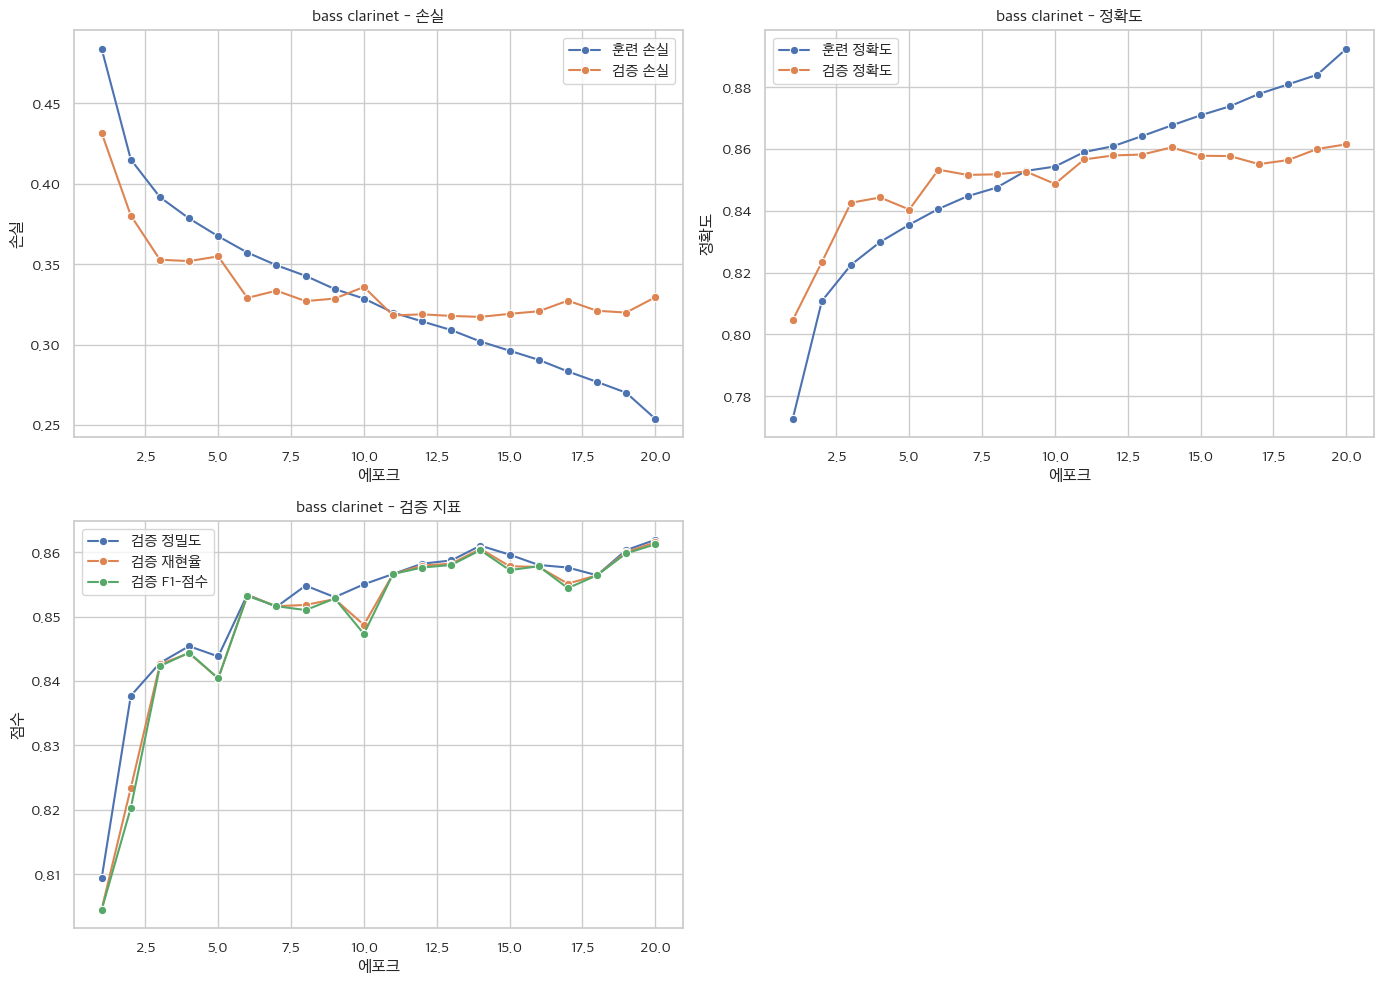

bass clarinet의 지표를 시각화하고 'instrument_plots/bass clarinet_metrics.png'에 저장했습니다.



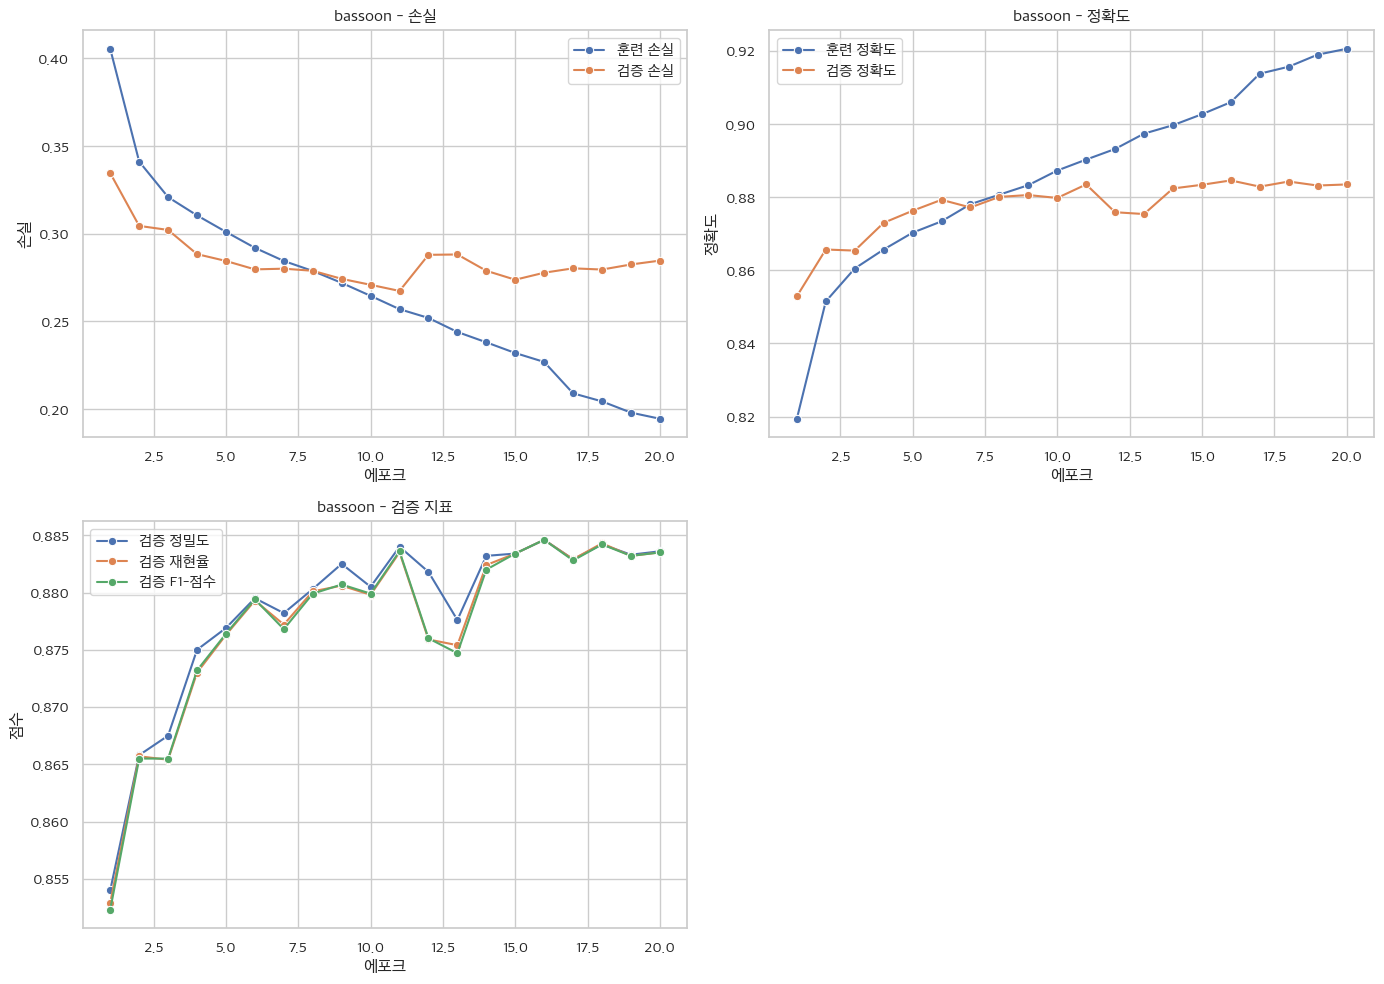

bassoon의 지표를 시각화하고 'instrument_plots/bassoon_metrics.png'에 저장했습니다.



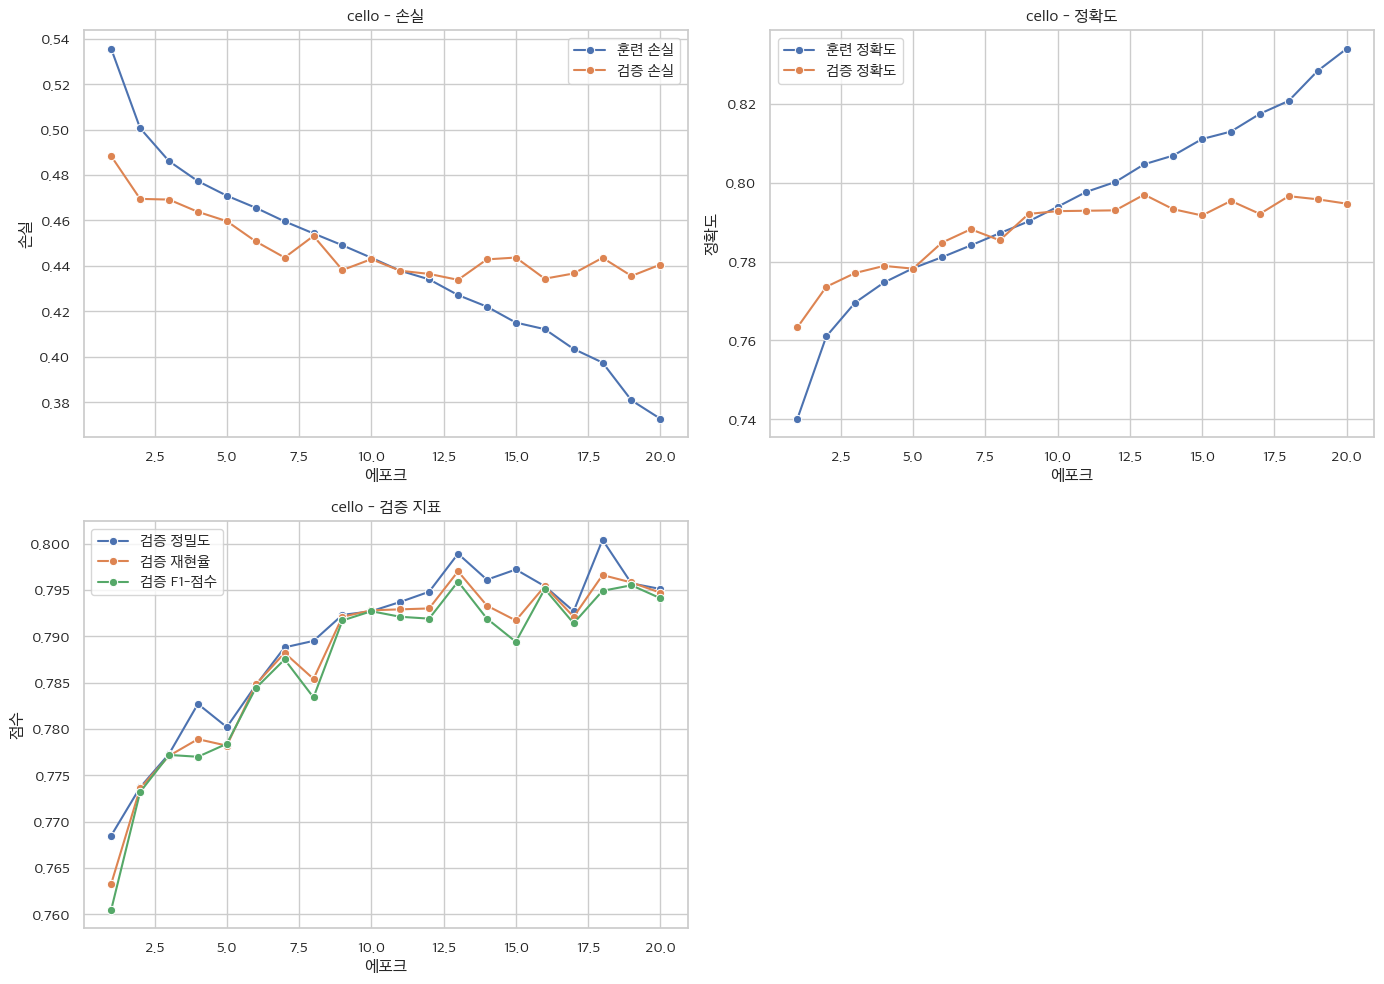

cello의 지표를 시각화하고 'instrument_plots/cello_metrics.png'에 저장했습니다.



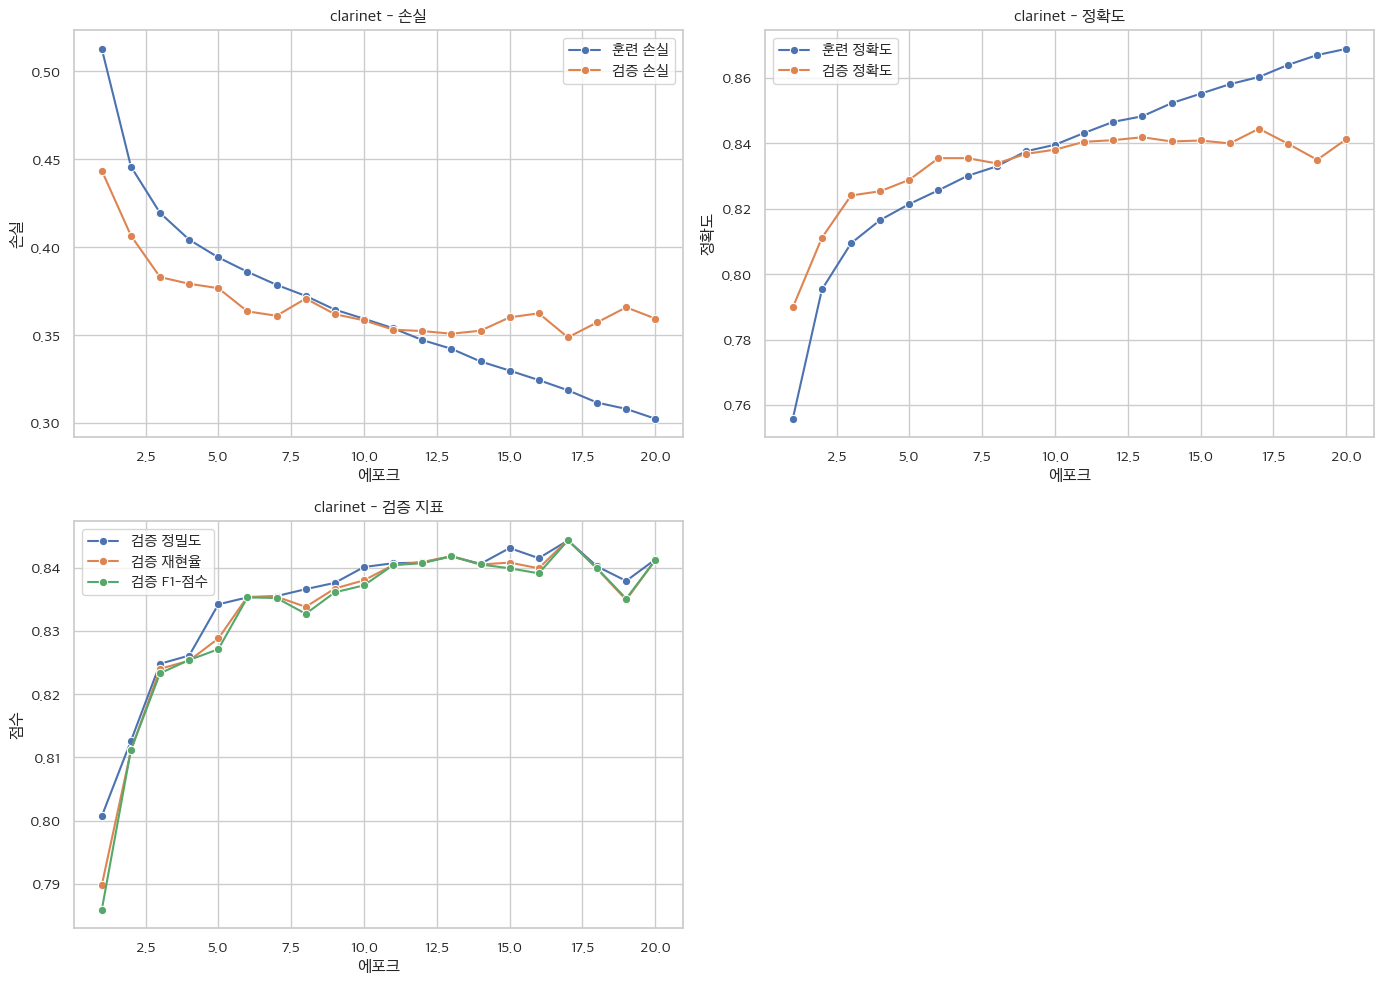

clarinet의 지표를 시각화하고 'instrument_plots/clarinet_metrics.png'에 저장했습니다.



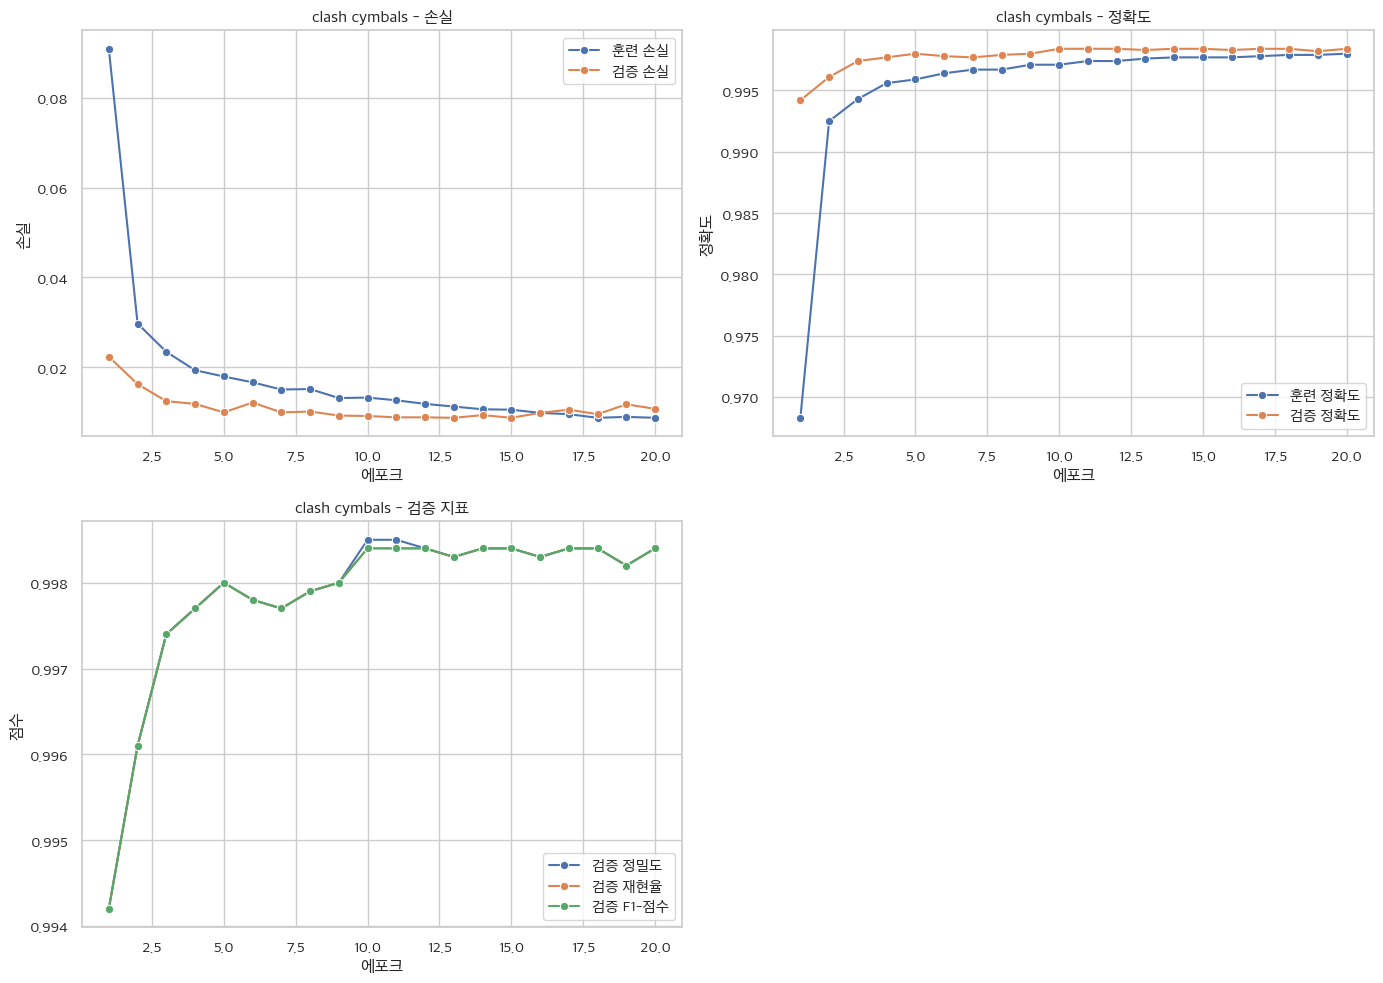

clash cymbals의 지표를 시각화하고 'instrument_plots/clash cymbals_metrics.png'에 저장했습니다.



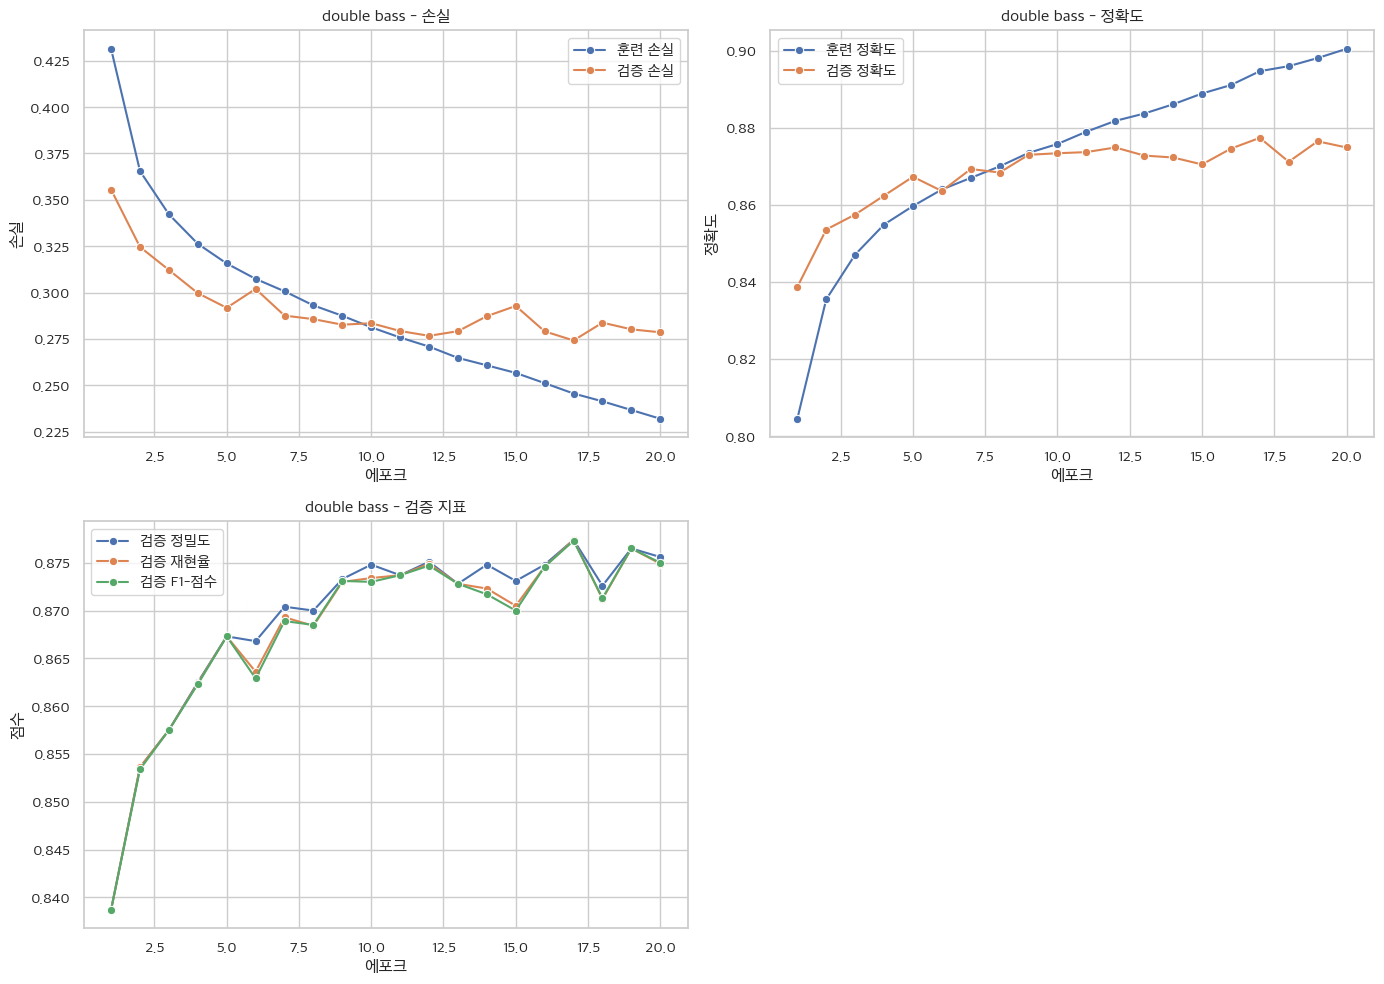

double bass의 지표를 시각화하고 'instrument_plots/double bass_metrics.png'에 저장했습니다.



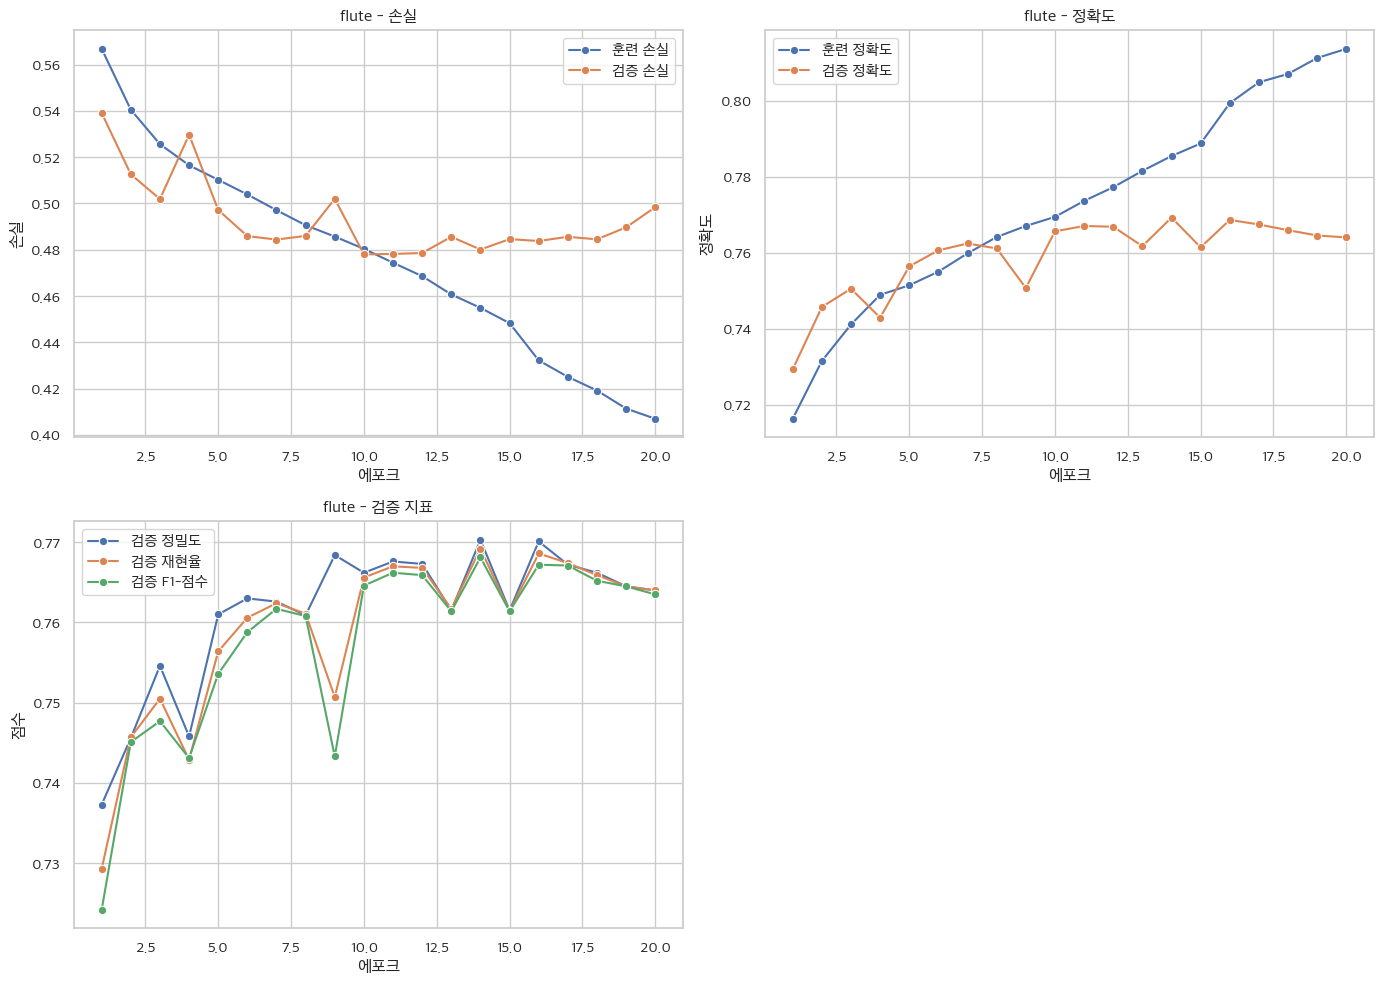

flute의 지표를 시각화하고 'instrument_plots/flute_metrics.png'에 저장했습니다.



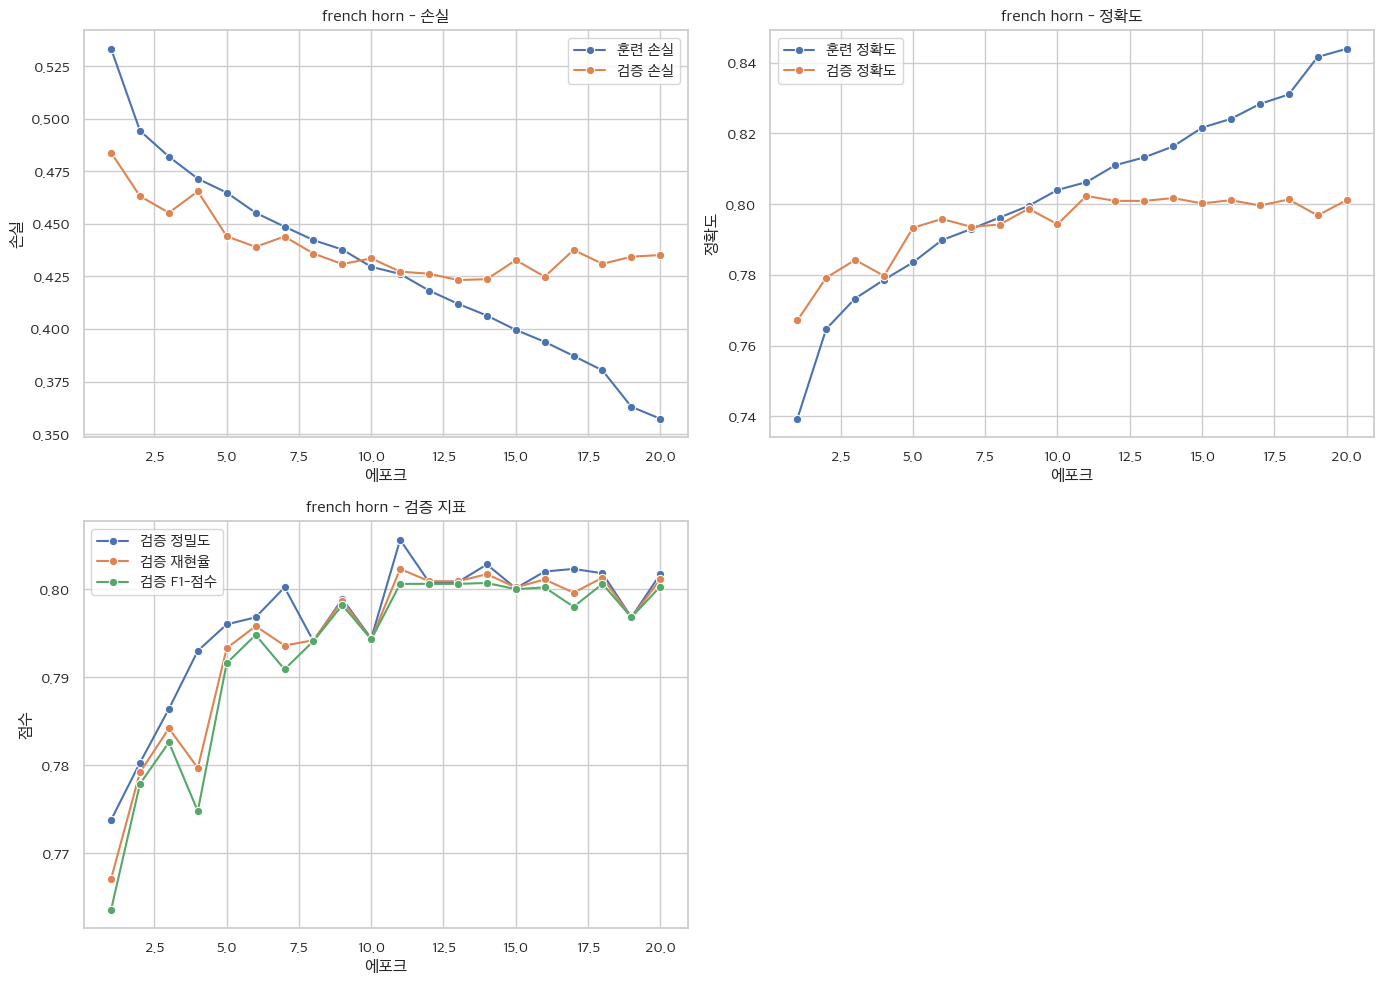

french horn의 지표를 시각화하고 'instrument_plots/french horn_metrics.png'에 저장했습니다.



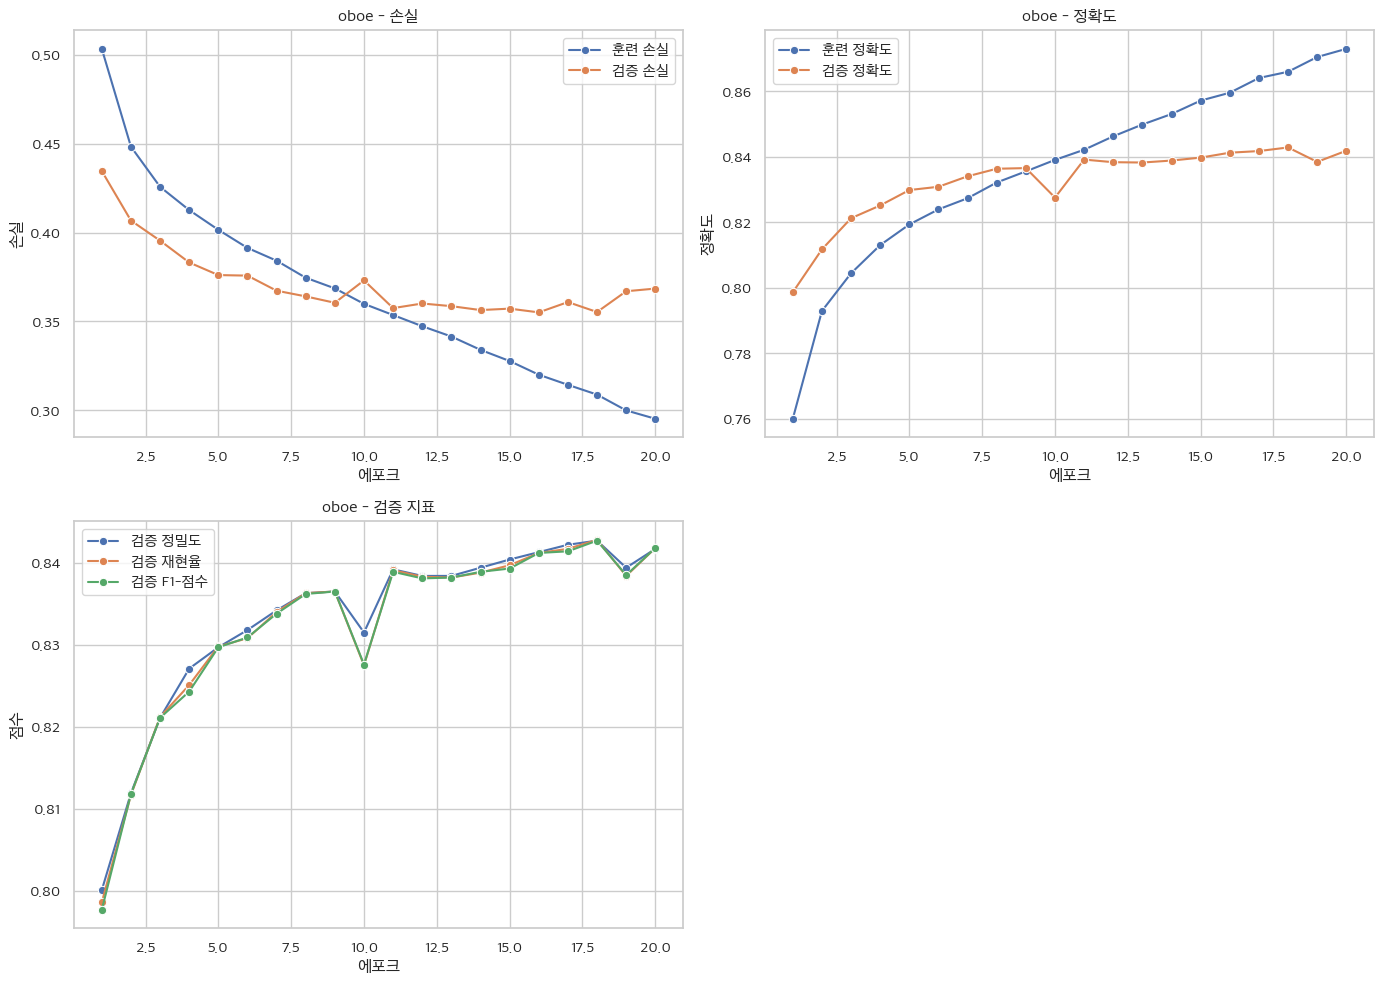

oboe의 지표를 시각화하고 'instrument_plots/oboe_metrics.png'에 저장했습니다.



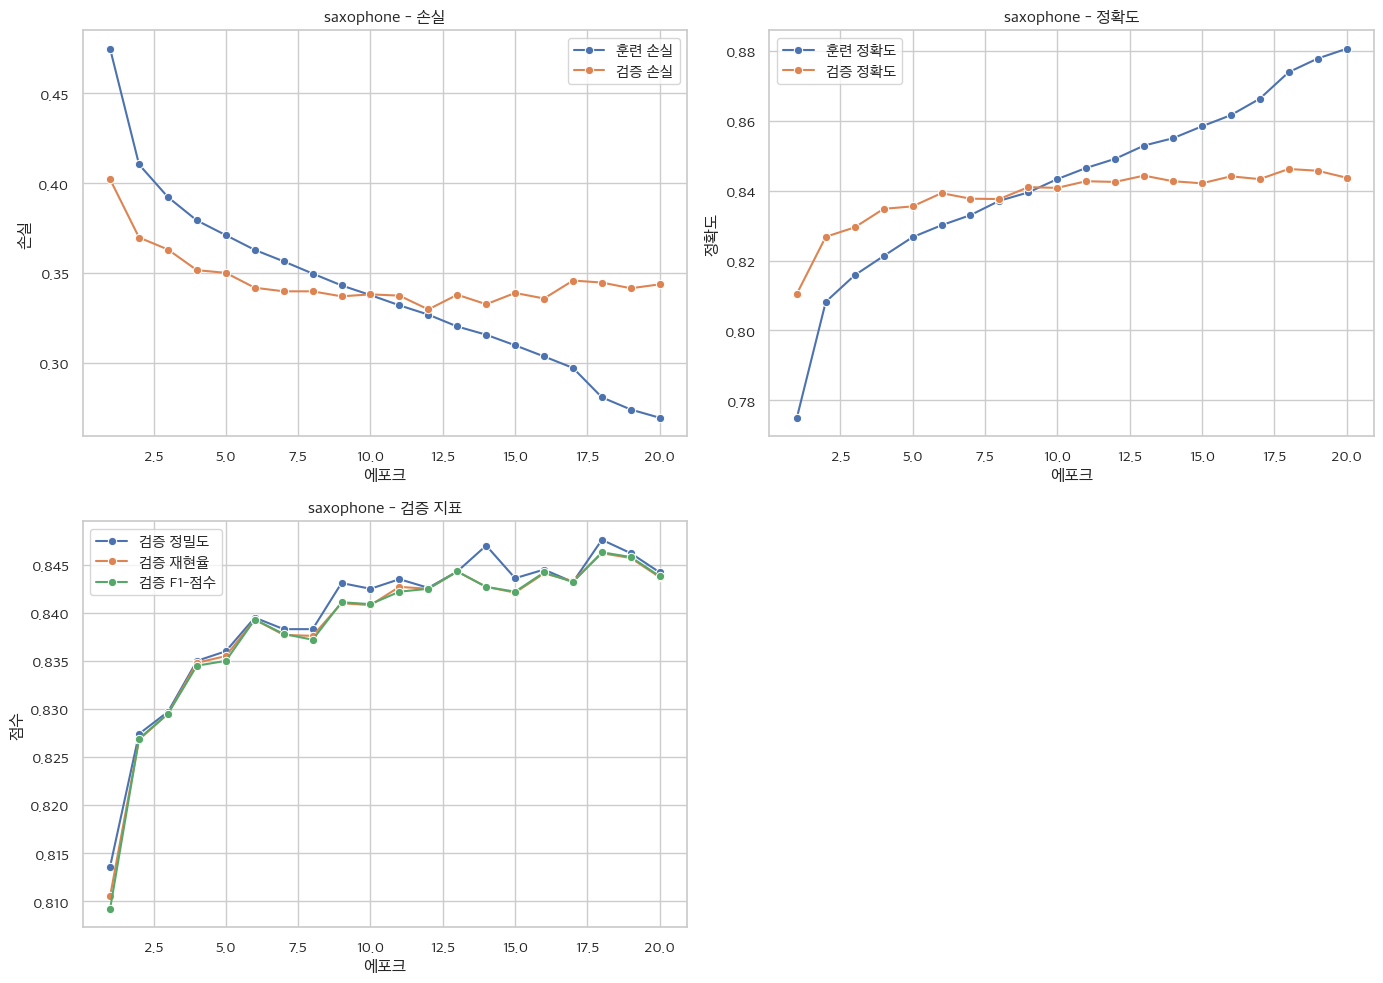

saxophone의 지표를 시각화하고 'instrument_plots/saxophone_metrics.png'에 저장했습니다.



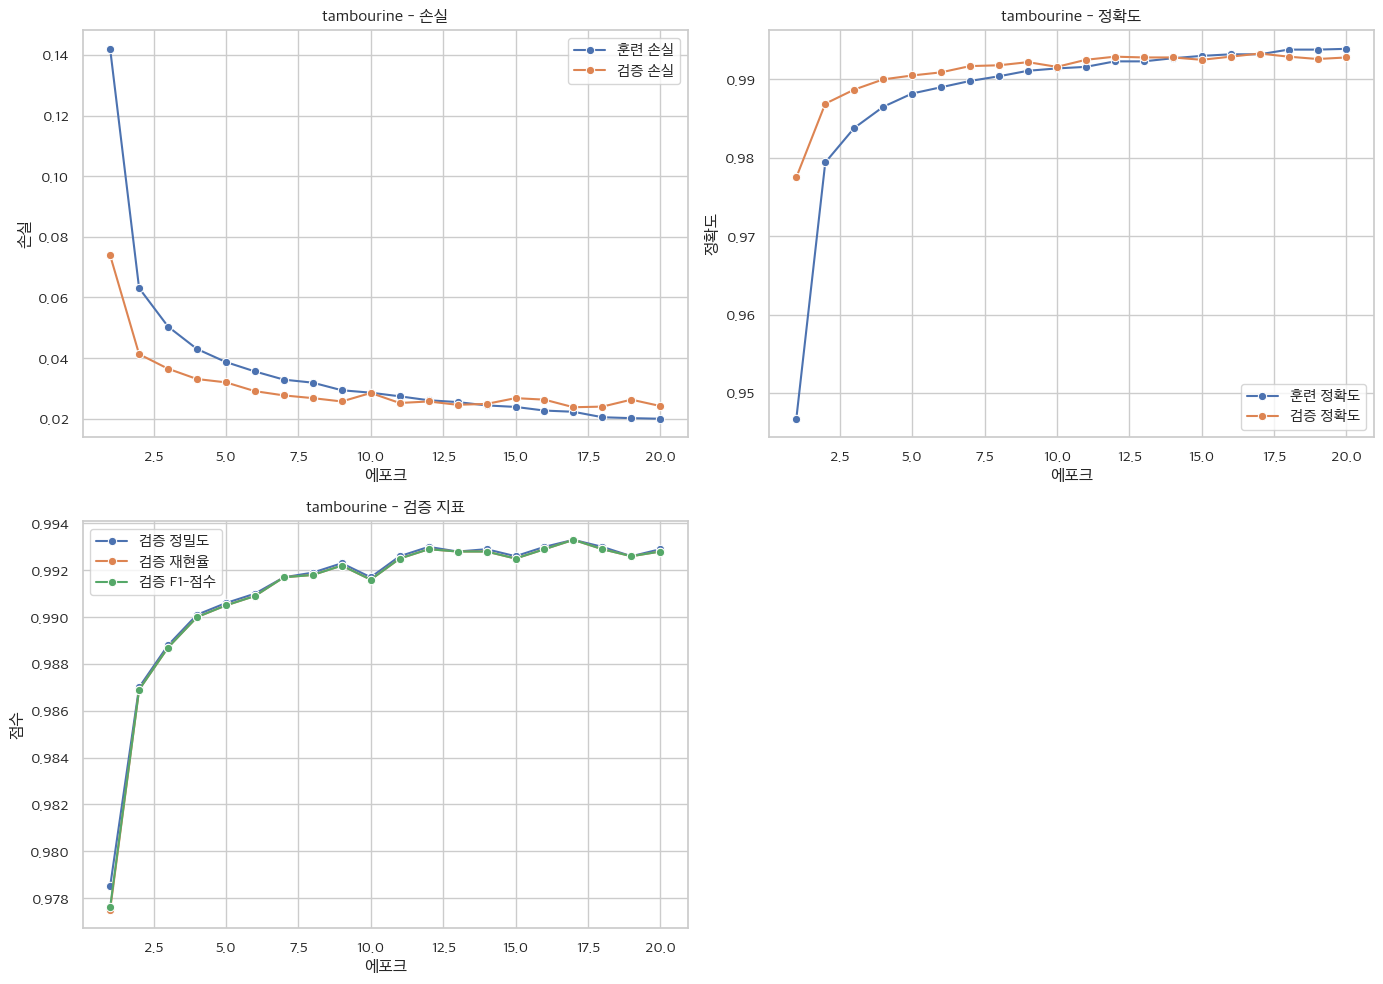

tambourine의 지표를 시각화하고 'instrument_plots/tambourine_metrics.png'에 저장했습니다.



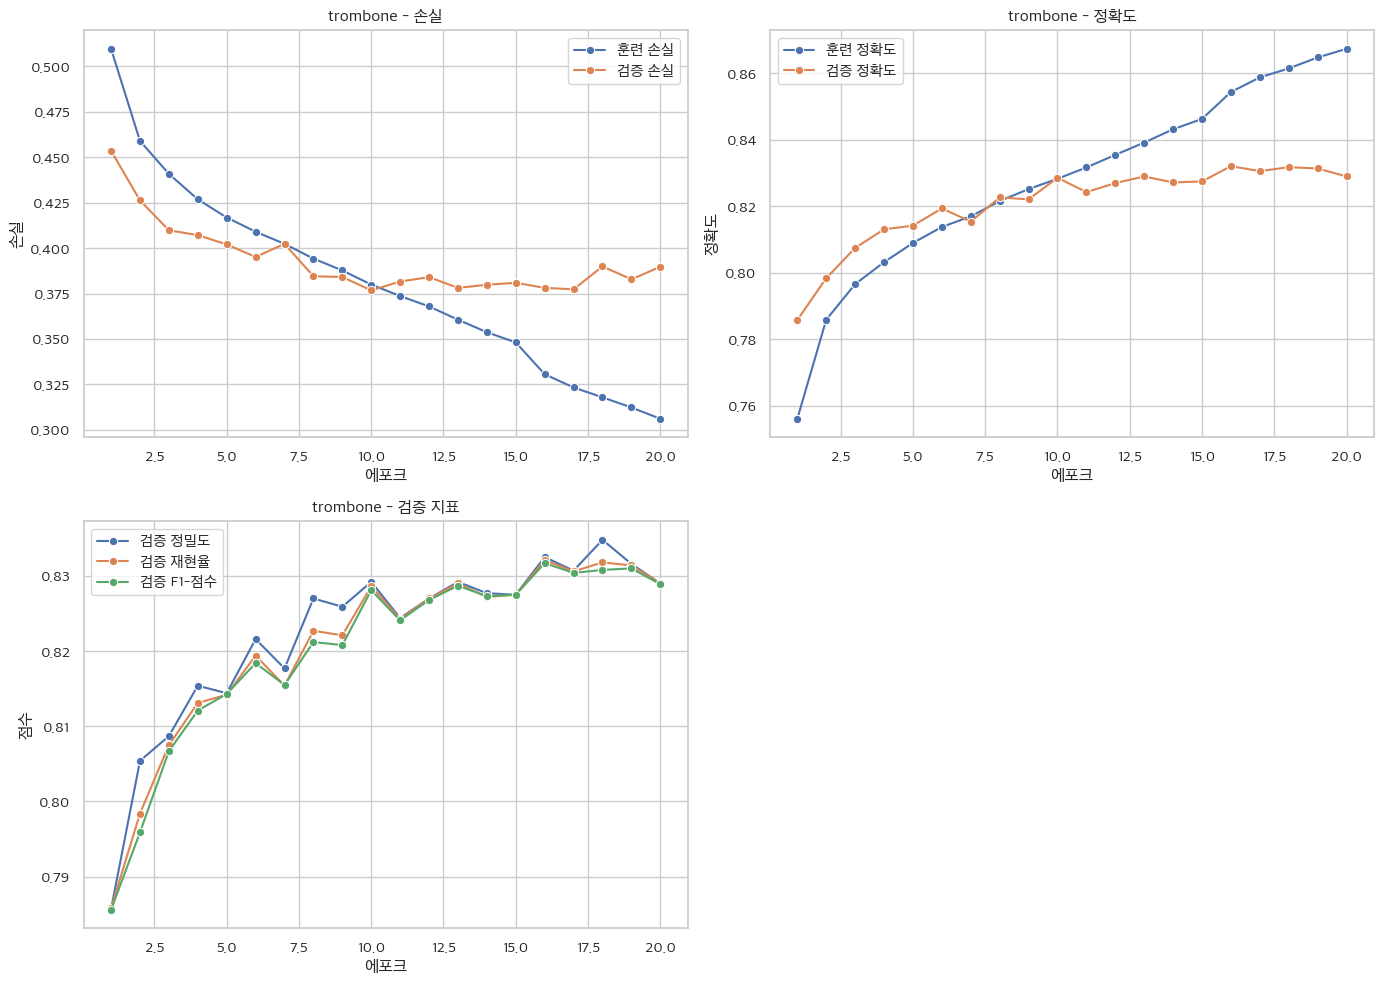

trombone의 지표를 시각화하고 'instrument_plots/trombone_metrics.png'에 저장했습니다.



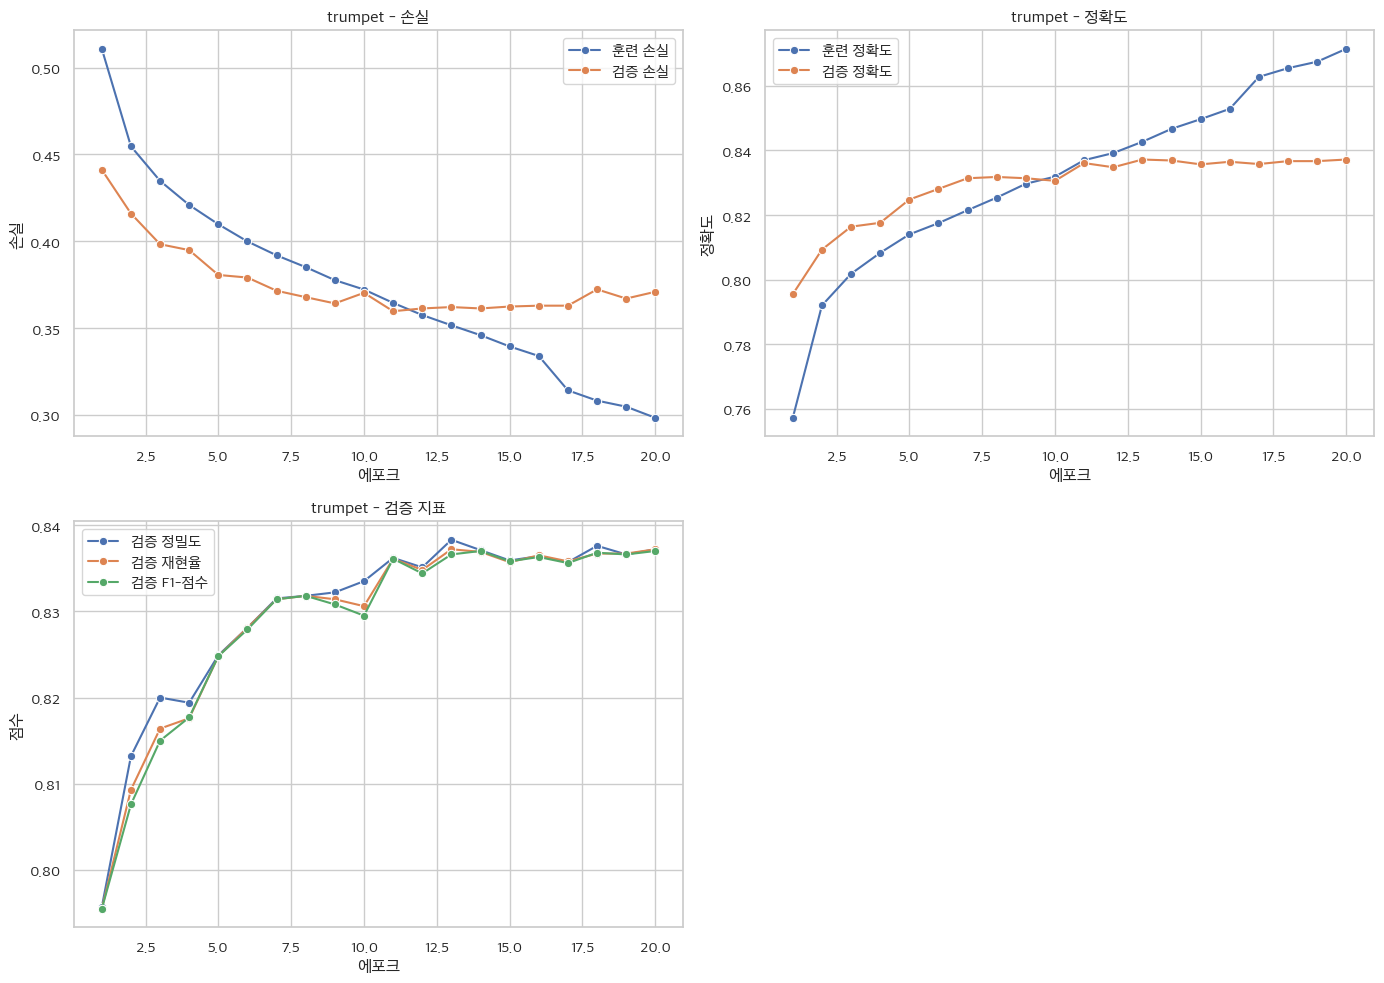

trumpet의 지표를 시각화하고 'instrument_plots/trumpet_metrics.png'에 저장했습니다.



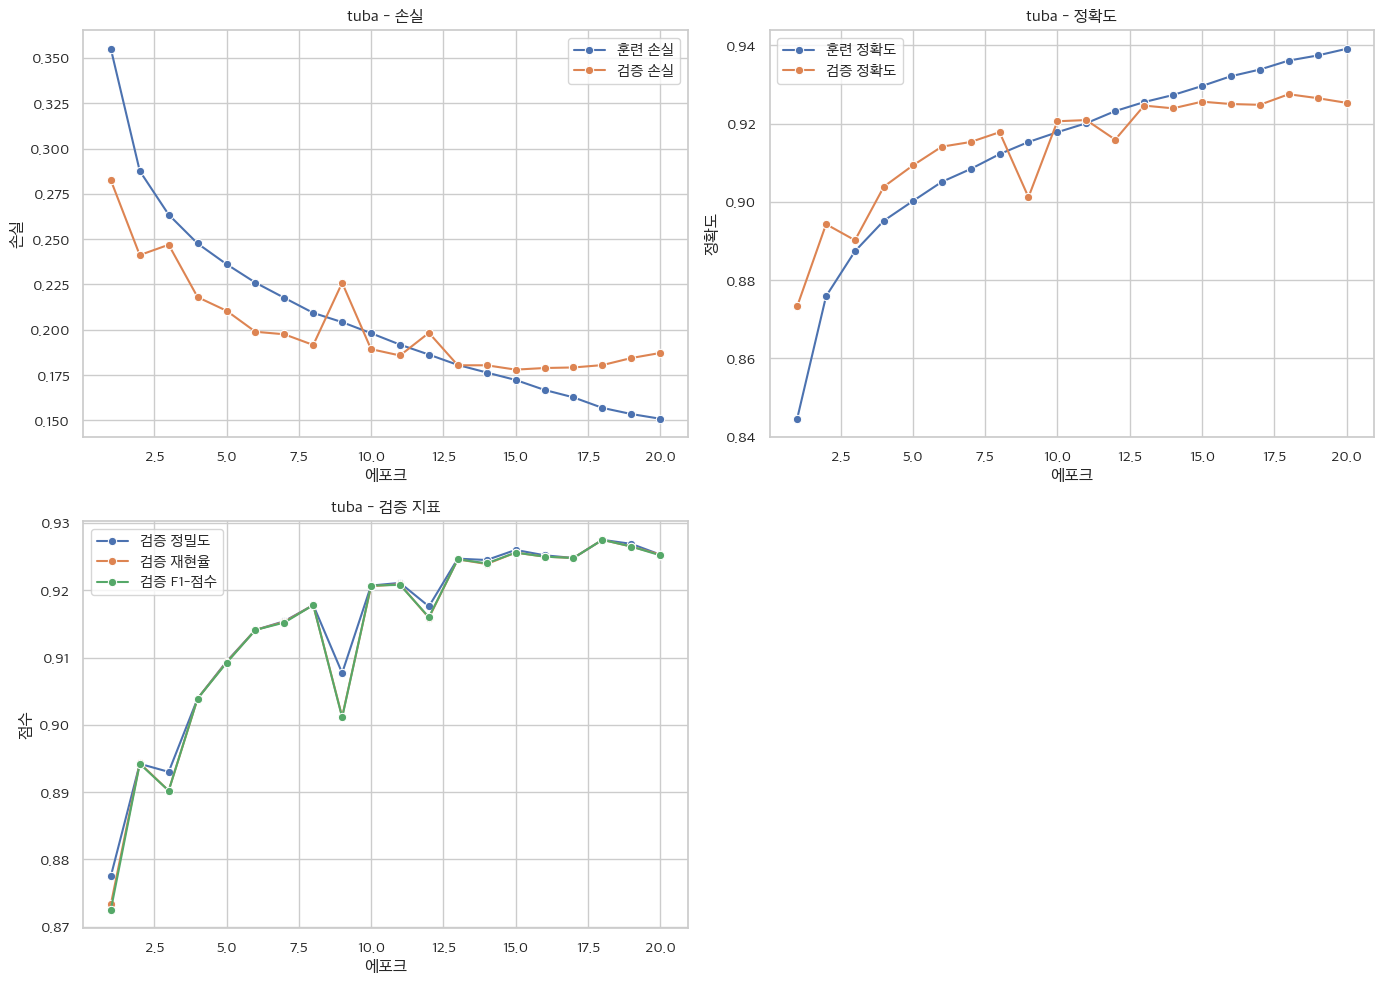

tuba의 지표를 시각화하고 'instrument_plots/tuba_metrics.png'에 저장했습니다.



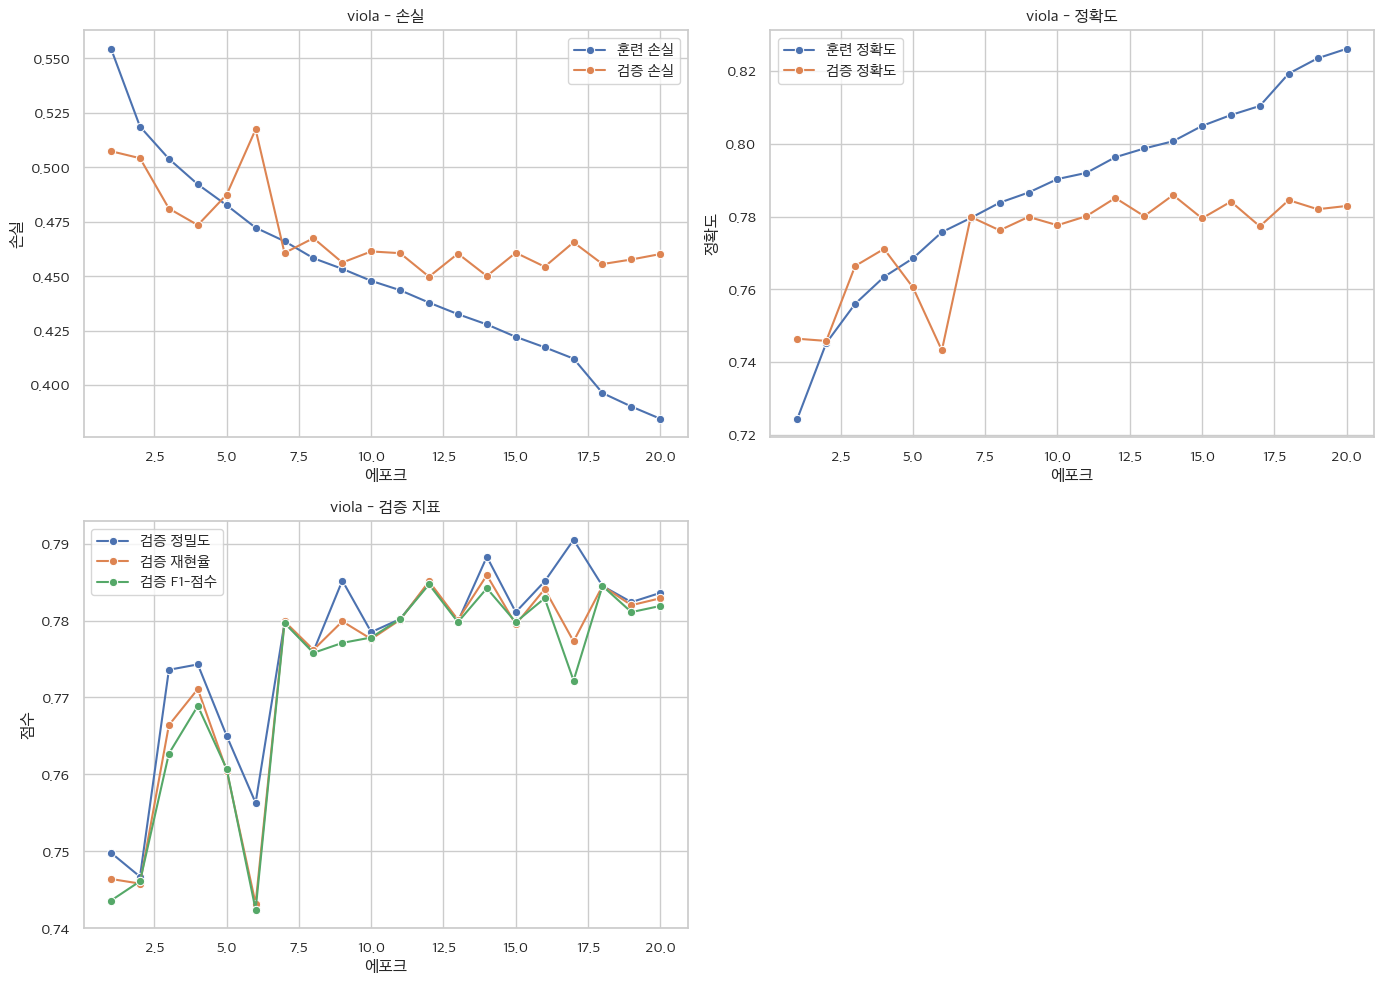

viola의 지표를 시각화하고 'instrument_plots/viola_metrics.png'에 저장했습니다.



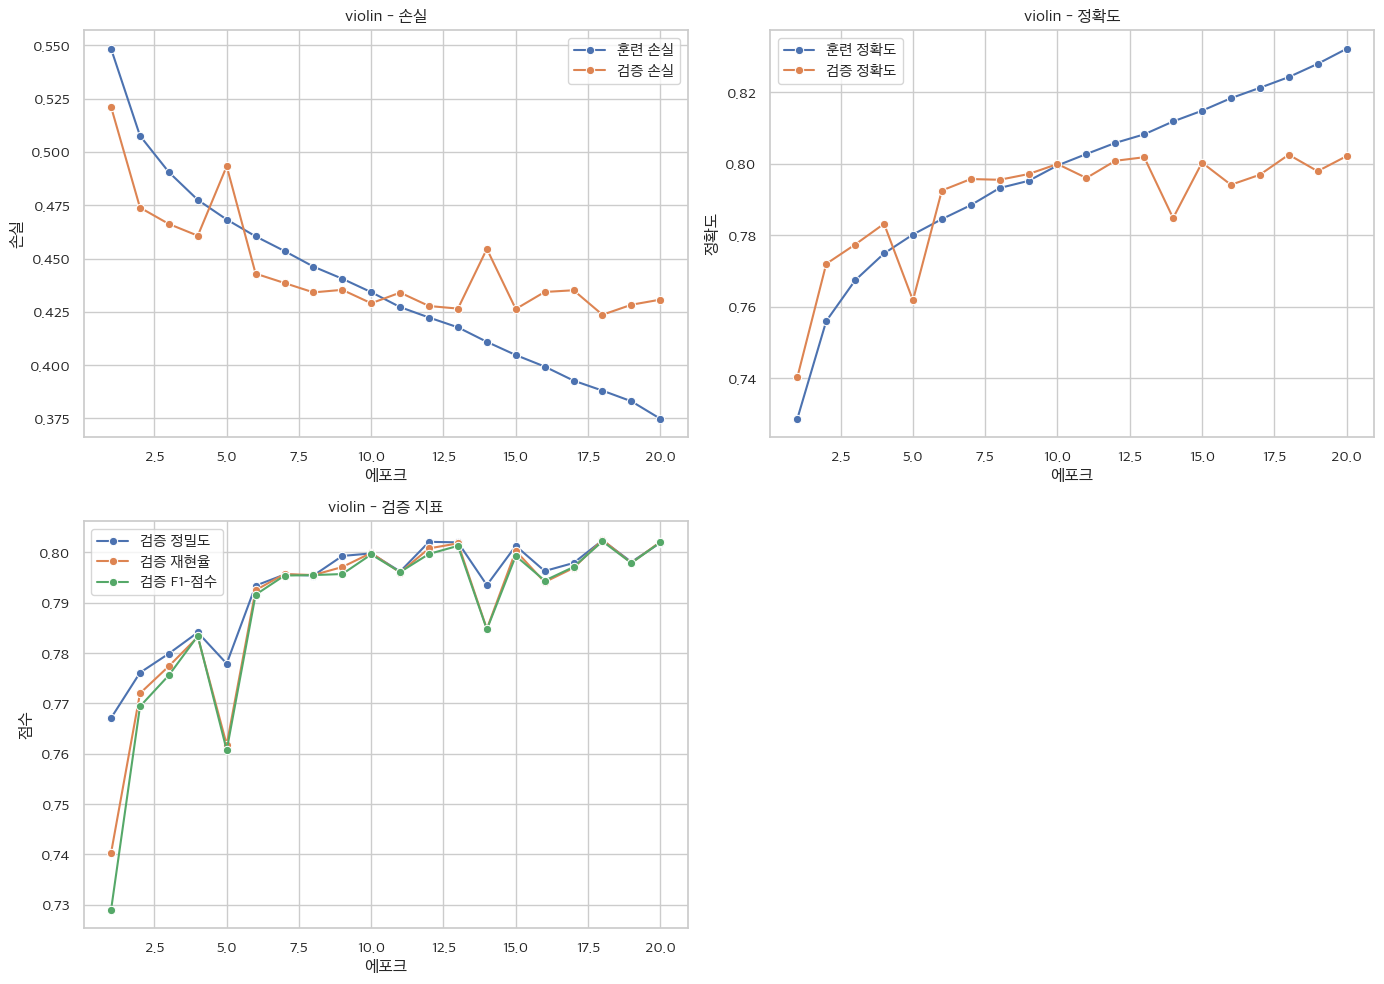

violin의 지표를 시각화하고 'instrument_plots/violin_metrics.png'에 저장했습니다.



In [ ]:
# 그래프를 저장할 디렉토리 생성 (선택 사항)
output_dir = '../logs/instrument_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 각 악기별로 지표 시각화
for instrument, df in instrument_data.items():
    plt.figure(figsize=(14, 10))
    
    # 서브플롯 1: 손실
    plt.subplot(2, 2, 1)
    sns.lineplot(x='에포크', y='훈련 손실', data=df, label='훈련 손실', marker='o')
    sns.lineplot(x='에포크', y='검증 손실', data=df, label='검증 손실', marker='o')
    plt.title(f'{instrument} - 손실')
    plt.xlabel('에포크')
    plt.ylabel('손실')
    plt.legend()
    
    # 서브플롯 2: 정확도
    plt.subplot(2, 2, 2)
    sns.lineplot(x='에포크', y='훈련 정확도', data=df, label='훈련 정확도', marker='o')
    sns.lineplot(x='에포크', y='검증 정확도', data=df, label='검증 정확도', marker='o')
    plt.title(f'{instrument} - 정확도')
    plt.xlabel('에포크')
    plt.ylabel('정확도')
    plt.legend()
    
    # 서브플롯 3: 정밀도, 재현율, F1-점수
    plt.subplot(2, 2, 3)
    sns.lineplot(x='에포크', y='검증 정밀도', data=df, label='검증 정밀도', marker='o')
    sns.lineplot(x='에포크', y='검증 재현율', data=df, label='검증 재현율', marker='o')
    sns.lineplot(x='에포크', y='검증 F1-점수', data=df, label='검증 F1-점수', marker='o')
    plt.title(f'{instrument} - 검증 지표')
    plt.xlabel('에포크')
    plt.ylabel('점수')
    plt.legend()
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    plot_filename = os.path.join(output_dir, f'{instrument}_metrics.png')
    plt.savefig(plot_filename)
    
    # 그래프 표시
    plt.show()
    
    print(f"{instrument}의 지표를 시각화하고 '{plot_filename}'에 저장했습니다.\n")


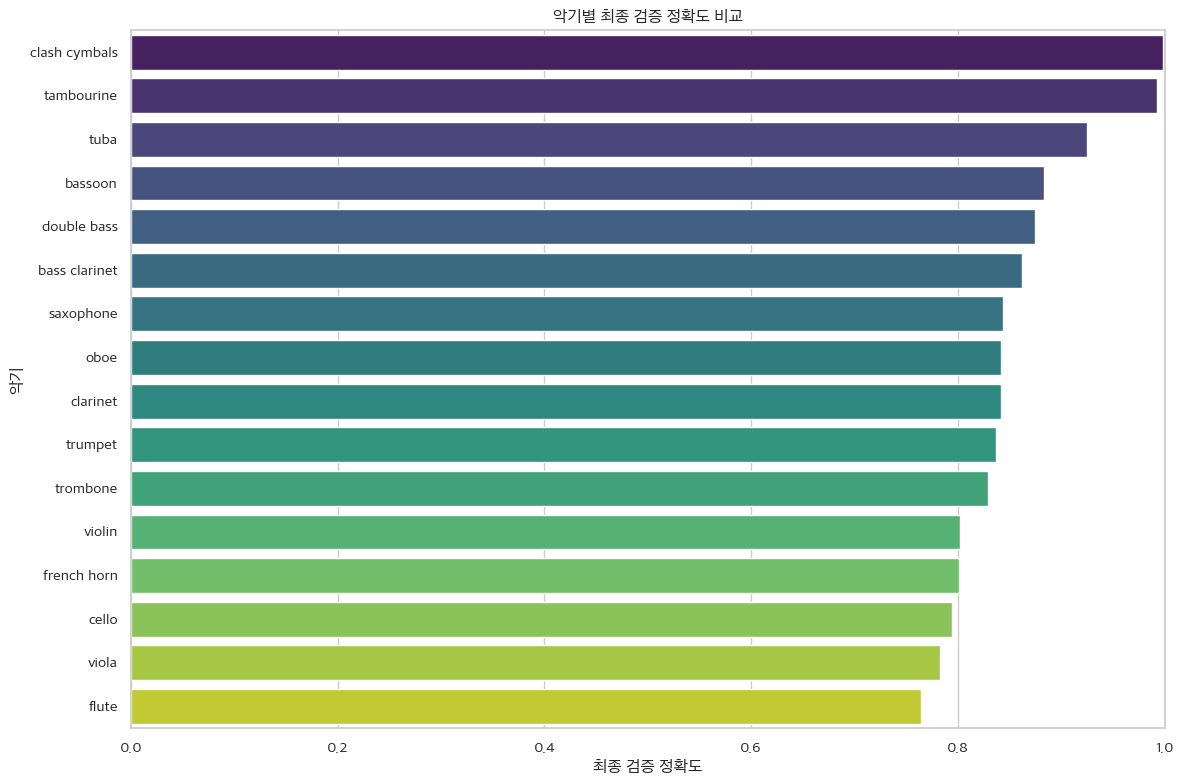

In [11]:
# 각 악기의 최종 검증 정확도 추출
final_val_acc = {instrument: df['검증 정확도'].iloc[-1] for instrument, df in instrument_data.items()}

# DataFrame으로 변환
final_val_acc_df = pd.DataFrame(list(final_val_acc.items()), columns=['악기', '최종 검증 정확도'])
final_val_acc_df = final_val_acc_df.sort_values(by='최종 검증 정확도', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
sns.barplot(x='최종 검증 정확도', y='악기', data=final_val_acc_df, palette='viridis')
plt.title('악기별 최종 검증 정확도 비교')
plt.xlabel('최종 검증 정확도')
plt.ylabel('악기')
plt.xlim(0, 1)  # 정확도는 0에서 1 사이로 설정
plt.tight_layout()
plt.show()


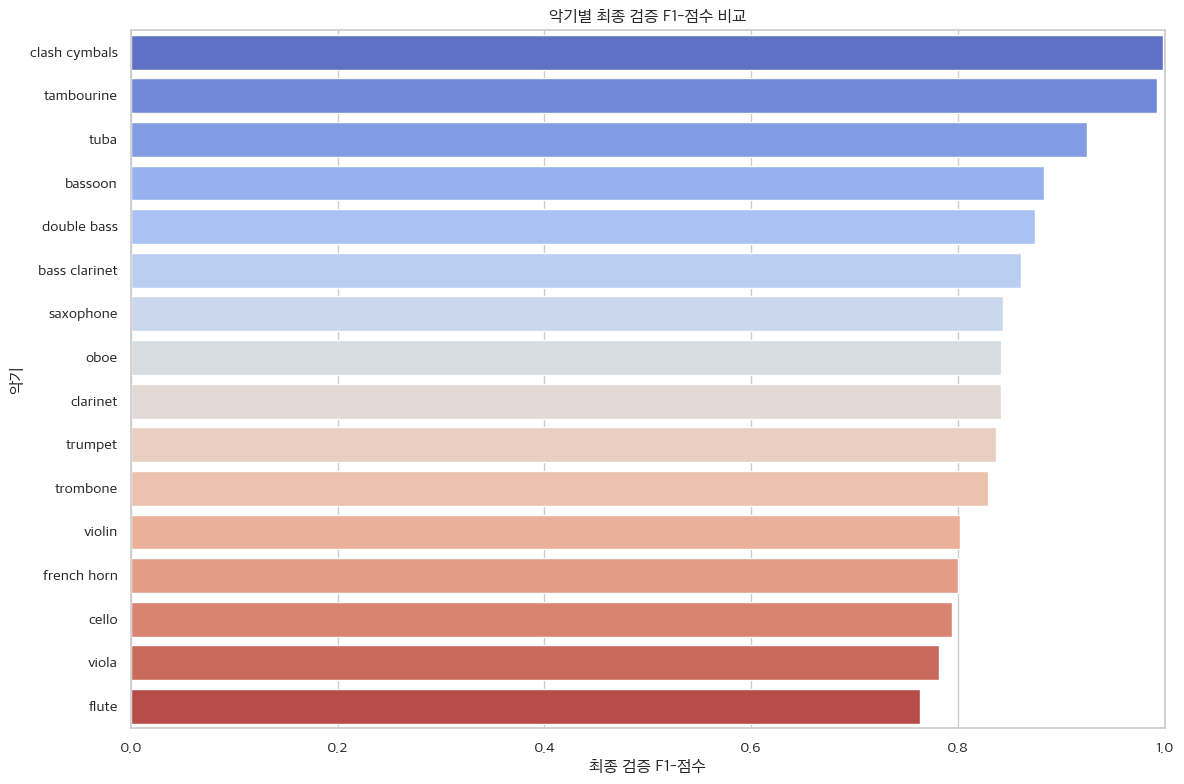

In [12]:
# 악기별 최종 검증 F1-점수 추출
final_val_f1 = {instrument: df['검증 F1-점수'].iloc[-1] for instrument, df in instrument_data.items()}

# DataFrame으로 변환
final_val_f1_df = pd.DataFrame(list(final_val_f1.items()), columns=['악기', '최종 검증 F1-점수'])
final_val_f1_df = final_val_f1_df.sort_values(by='최종 검증 F1-점수', ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
sns.barplot(x='최종 검증 F1-점수', y='악기', data=final_val_f1_df, palette='coolwarm')
plt.title('악기별 최종 검증 F1-점수 비교')
plt.xlabel('최종 검증 F1-점수')
plt.ylabel('악기')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


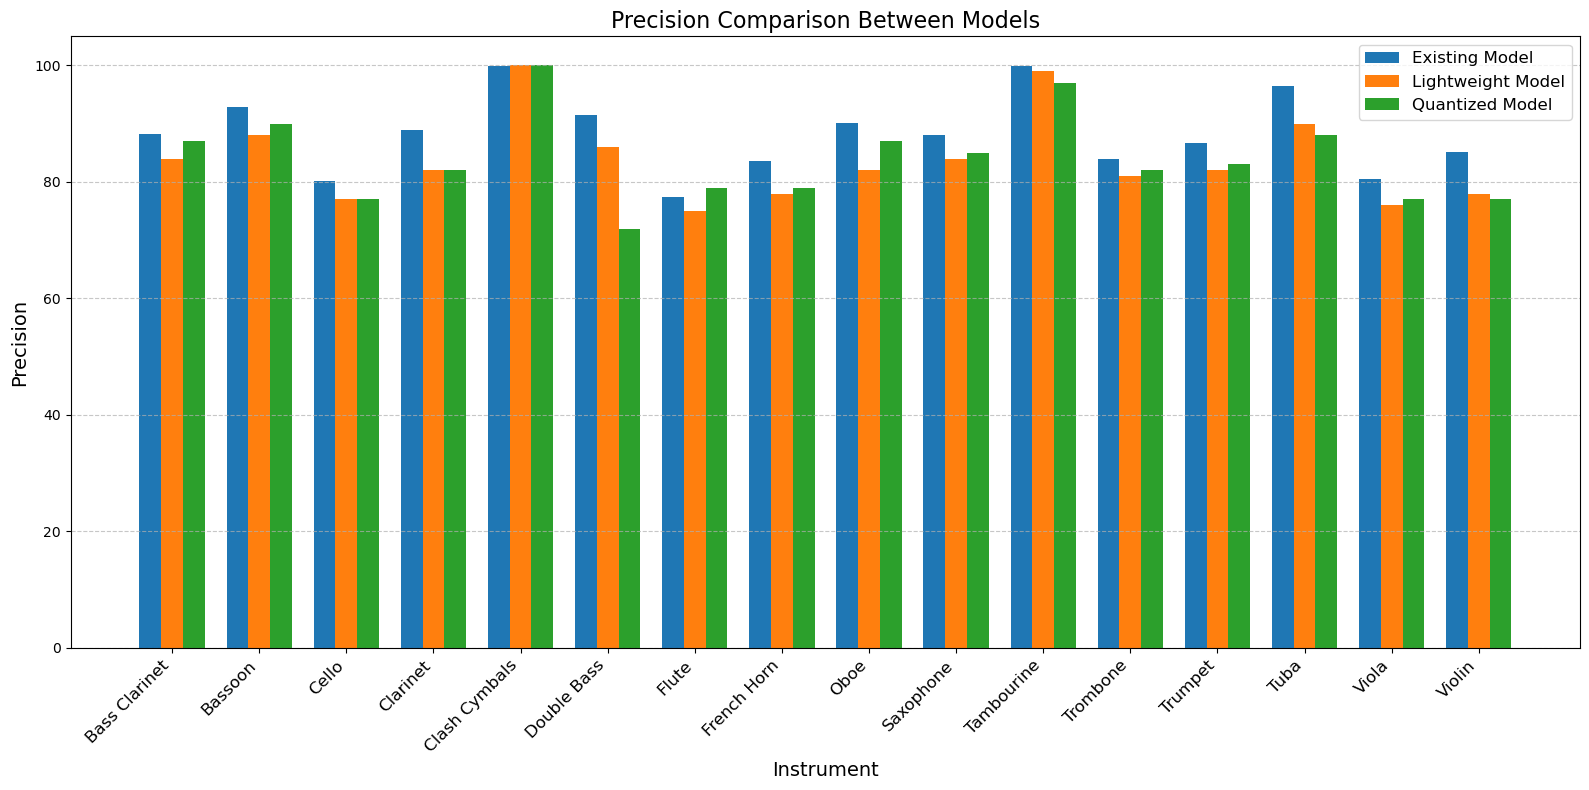

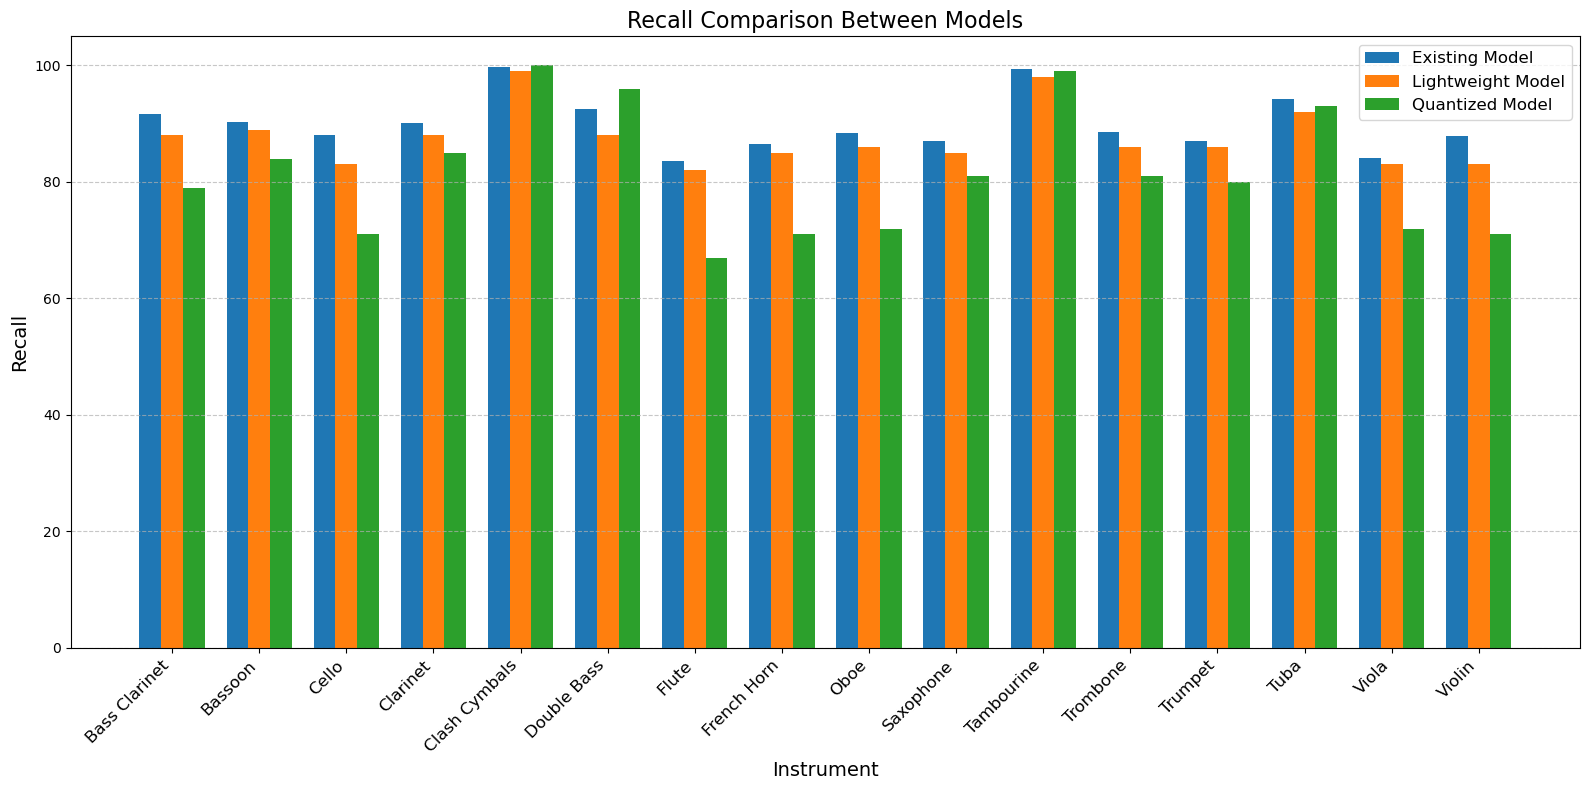

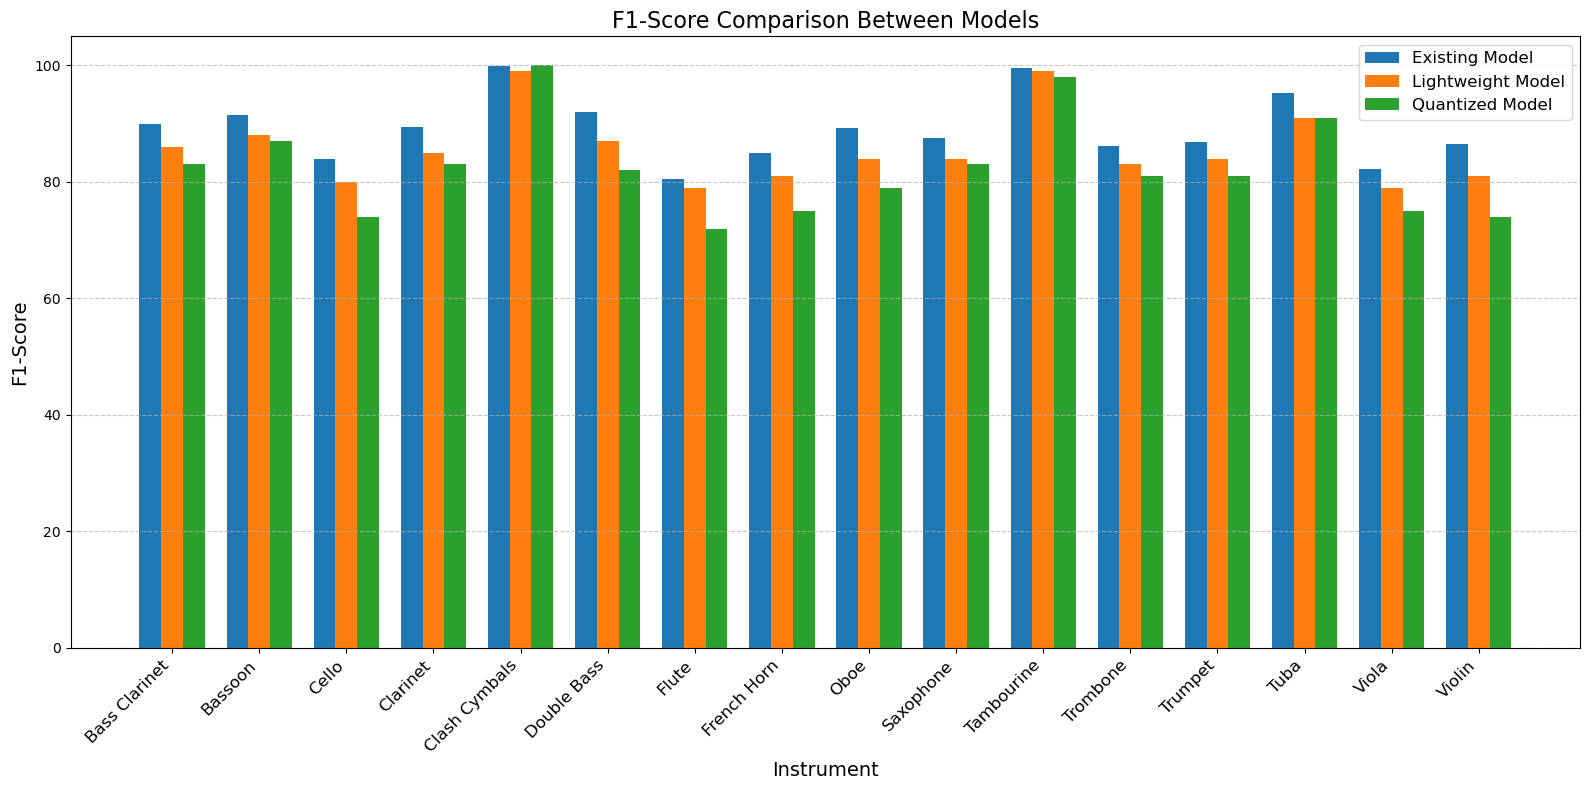

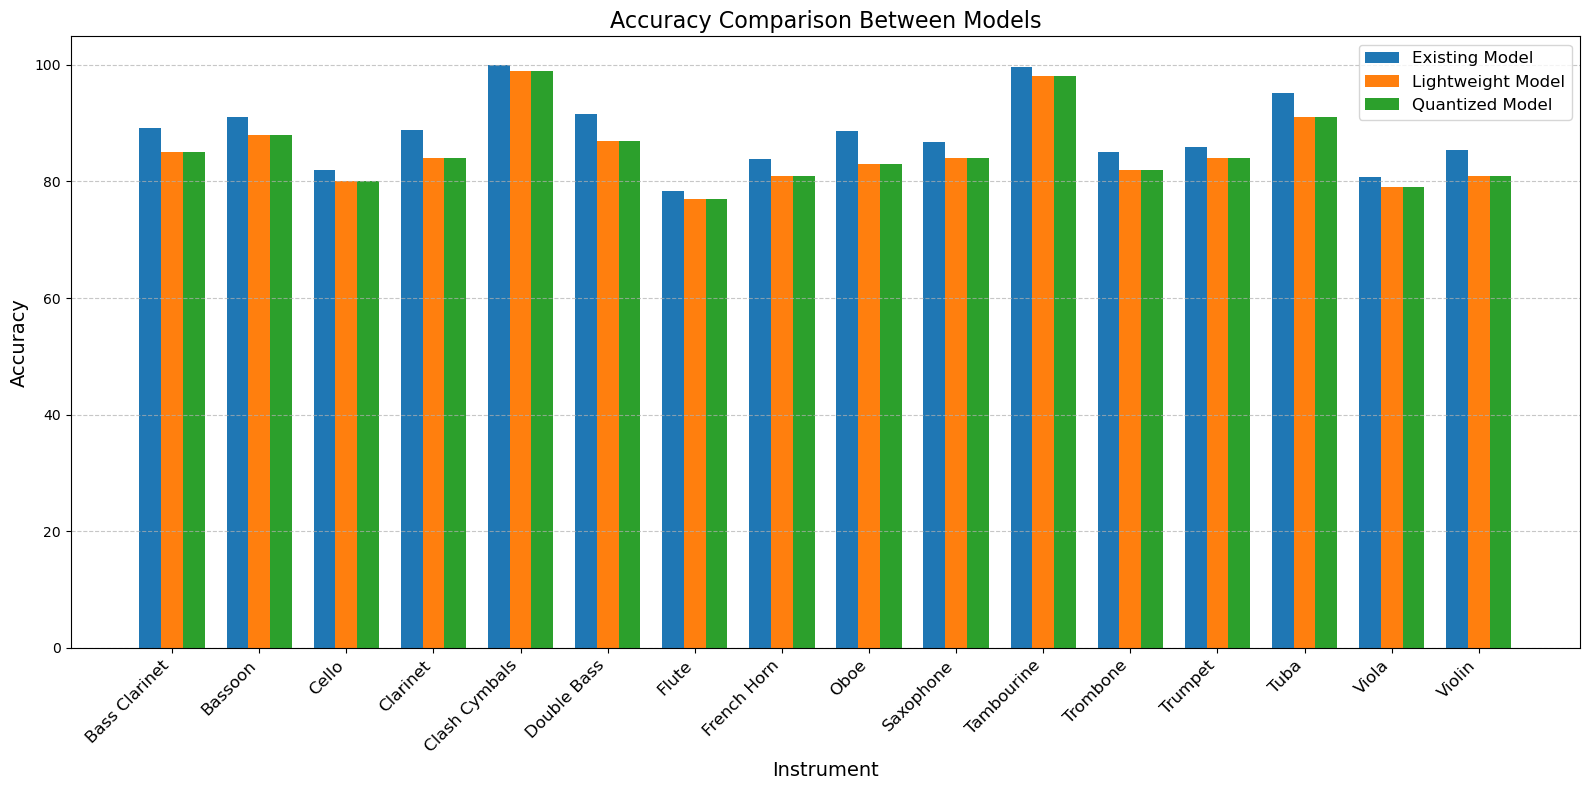

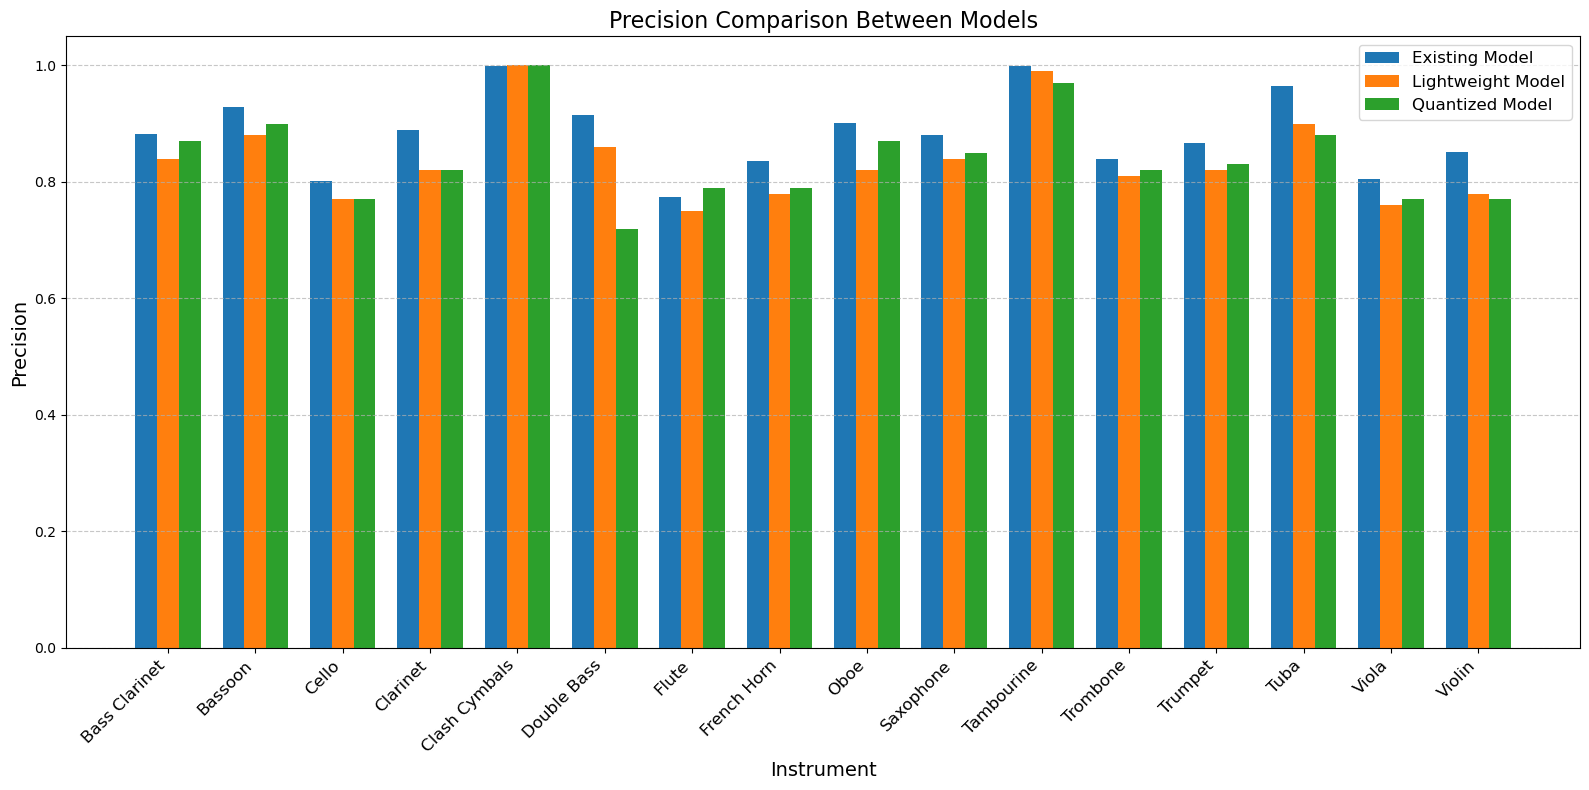

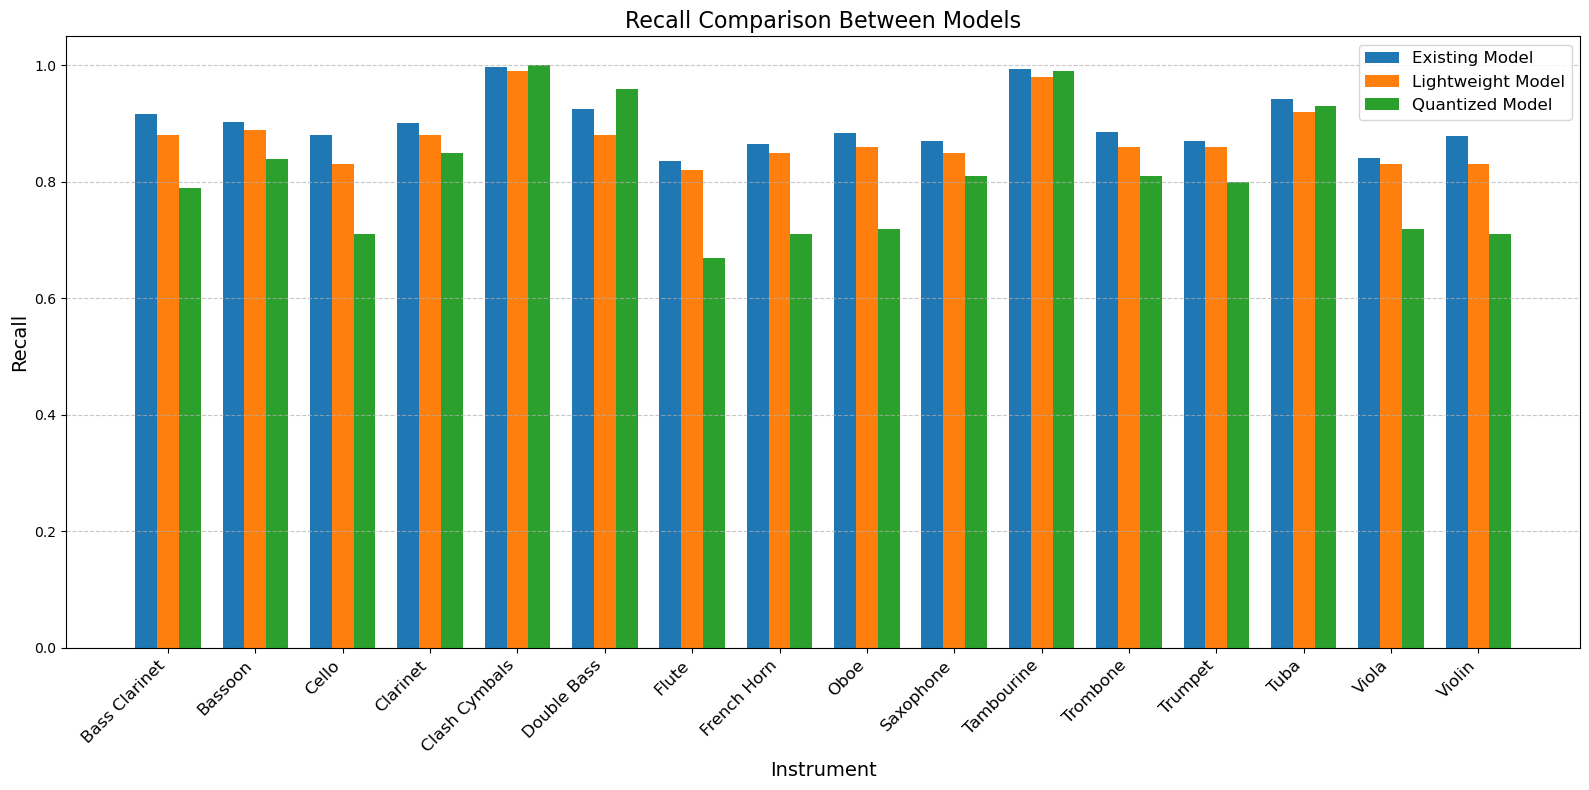

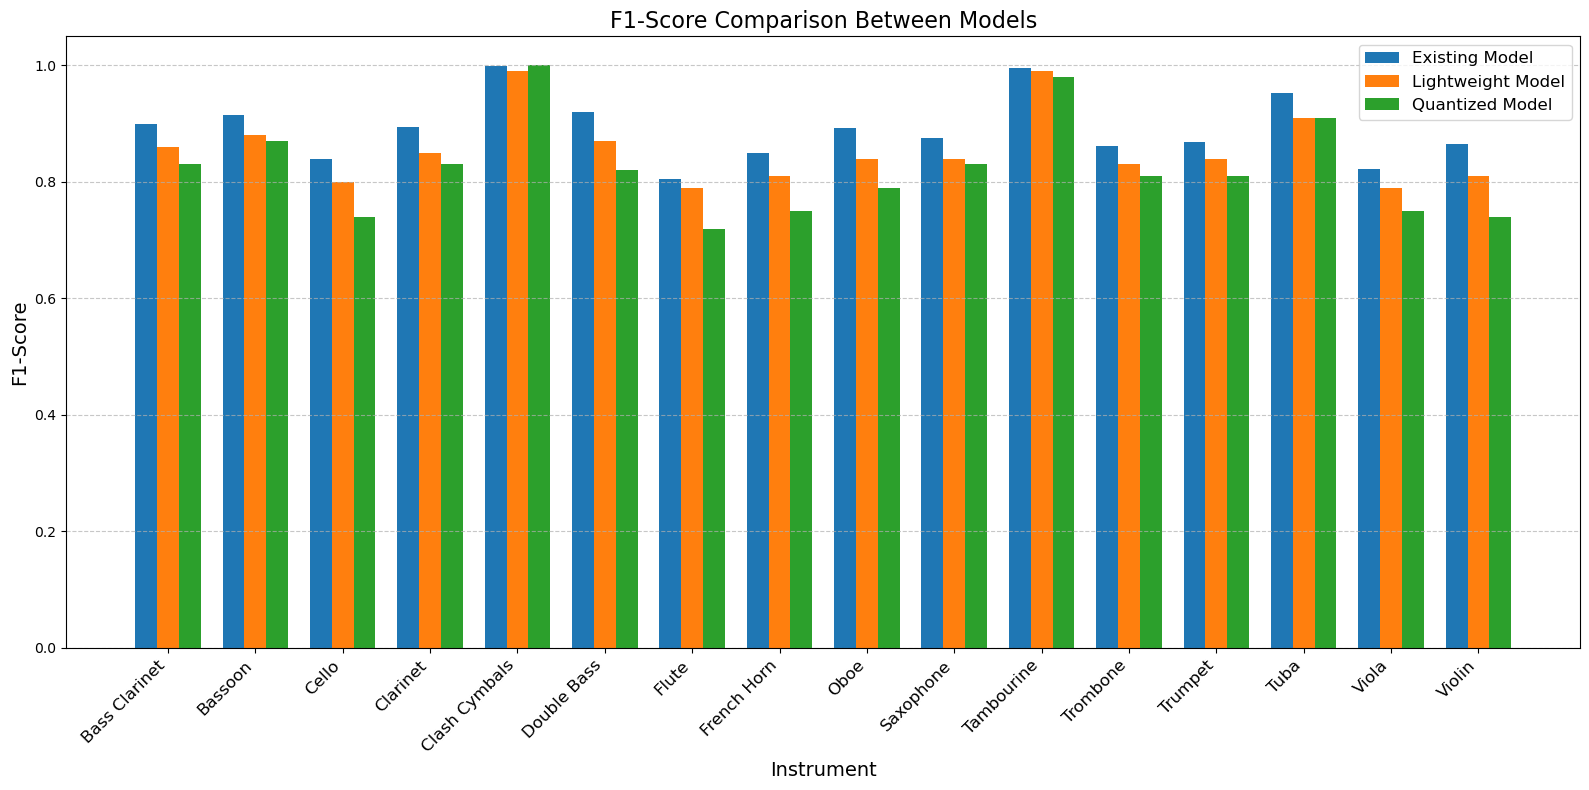

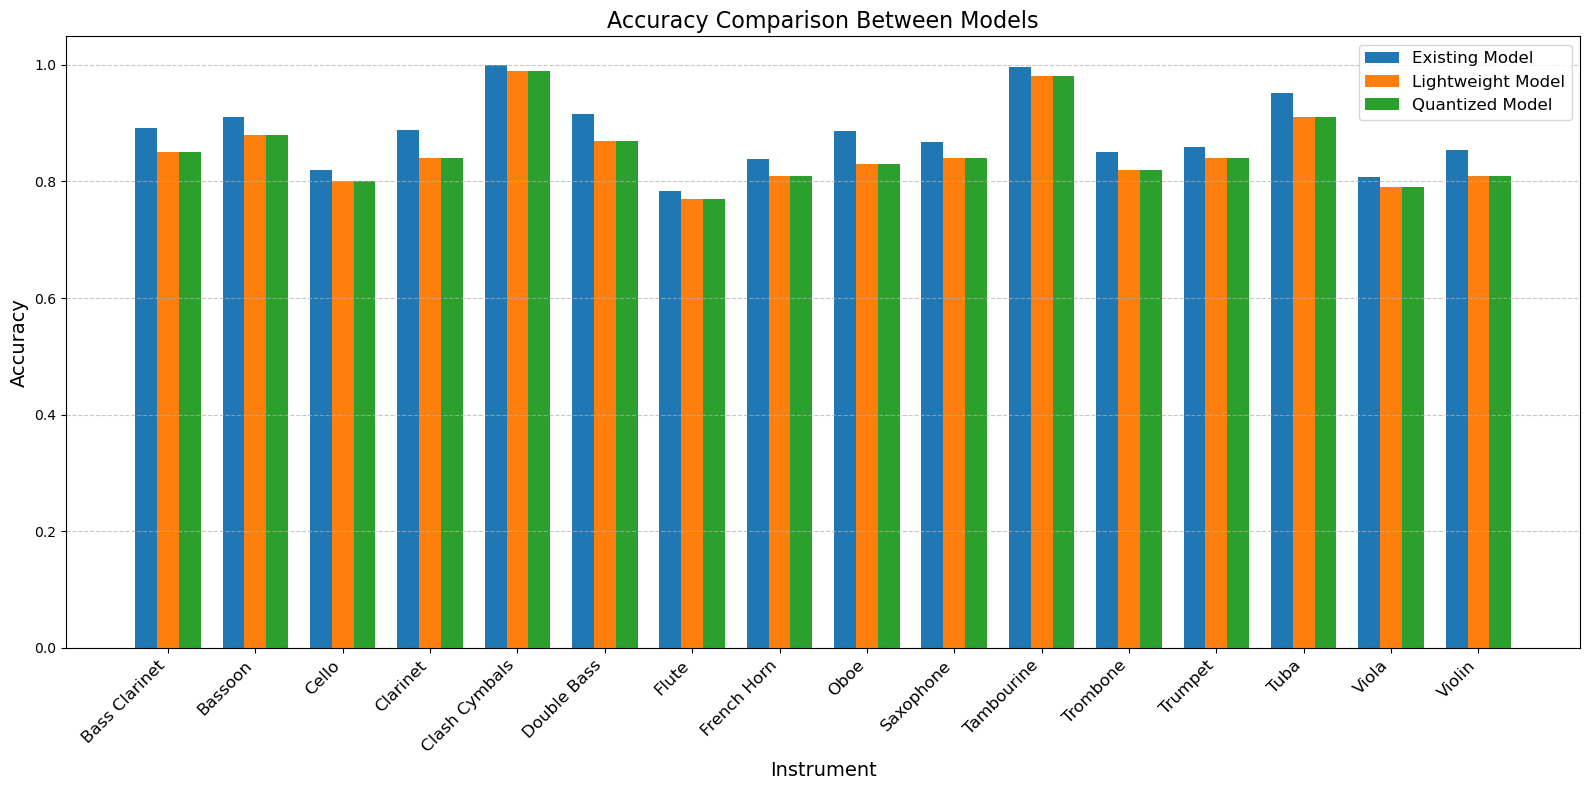

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 모델 성능 데이터 입력 (예시 데이터)
data_existing_model = {
    "Instrument": [
        "Bass Clarinet", "Bassoon", "Cello", "Clarinet", "Clash Cymbals",
        "Double Bass", "Flute", "French Horn", "Oboe", "Saxophone",
        "Tambourine", "Trombone", "Trumpet", "Tuba", "Viola", "Violin"
    ],
    "Precision": [88.29, 92.85, 80.12, 88.85, 99.99, 91.53, 77.49, 83.58, 90.05, 88.01, 99.89, 83.92, 86.74, 96.41, 80.50, 85.13],
    "Recall": [91.63, 90.27, 88.07, 90.20, 99.77, 92.60, 83.67, 86.58, 88.39, 87.03, 99.37, 88.60, 86.97, 94.29, 84.18, 87.91],
    "F1-Score": [89.93, 91.54, 83.91, 89.52, 99.88, 92.06, 80.46, 85.05, 89.22, 87.52, 99.63, 86.19, 86.85, 95.34, 82.30, 86.50],
    "Accuracy": [89.10, 91.11, 82.01, 88.76, 99.88, 91.50, 78.43, 83.80, 88.64, 86.79, 99.60, 84.96, 85.98, 95.11, 80.79, 85.41]
}

data_lightweight_model = {
    "Instrument": [
        "Bass Clarinet", "Bassoon", "Cello", "Clarinet", "Clash Cymbals",
        "Double Bass", "Flute", "French Horn", "Oboe", "Saxophone",
        "Tambourine", "Trombone", "Trumpet", "Tuba", "Viola", "Violin"
    ],
    "Precision": [84, 88, 77, 82, 100, 86, 75, 78, 82, 84, 99, 81, 82, 90, 76, 78],
    "Recall": [88, 89, 83, 88, 99, 88, 82, 85, 86, 85, 98, 86, 86, 92, 83, 83],
    "F1-Score": [86, 88, 80, 85, 99, 87, 79, 81, 84, 84, 99, 83, 84, 91, 79, 81],
    "Accuracy": [85, 88, 80, 84, 99, 87, 77, 81, 83, 84, 98, 82, 84, 91, 79, 81]
}

# 양자화 모델 데이터 추가
data_quantized_model = {
    "Instrument": [
        "Bass Clarinet", "Bassoon", "Cello", "Clarinet", "Clash Cymbals",
        "Double Bass", "Flute", "French Horn", "Oboe", "Saxophone",
        "Tambourine", "Trombone", "Trumpet", "Tuba", "Viola", "Violin"
    ],
    "Precision": [87, 90, 77, 82, 100, 72, 79, 79, 87, 85, 97, 82, 83, 88, 77, 77],
    "Recall": [79, 84, 71, 85, 100, 96, 67, 71, 72, 81, 99, 81, 80, 93, 72, 71],
    "F1-Score": [83, 87, 74, 83, 100, 82, 72, 75, 79, 83, 98, 81, 81, 91, 75, 74],
    "Accuracy": [85, 88, 80, 84, 99, 87, 77, 81, 83, 84, 98, 82, 84, 91, 79, 81]  # Accuracy 추가
}

# 데이터프레임 생성
df_existing = pd.DataFrame(data_existing_model)
df_lightweight = pd.DataFrame(data_lightweight_model)
df_quantized = pd.DataFrame(data_quantized_model)

# 0에서 1로 정규화하는 함수
def normalize_column(df, columns):
    df_normalized = df.copy()
    for col in columns:
        df_normalized[col] = df[col] / 100  # 각 값을 100으로 나눠서 0~1 범위로 변환
    return df_normalized

# 정규화 대상 열
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]

# 데이터 정규화
df_existing_normalized = normalize_column(df_existing, metrics)
df_lightweight_normalized = normalize_column(df_lightweight, metrics)
df_quantized_normalized = normalize_column(df_quantized, metrics)




# 모든 모델 비교 시각화 함수 수정
def plot_comparison_all(df_existing, df_lightweight, df_quantized, metric):
    x = np.arange(len(df_existing["Instrument"]))
    width = 0.25  # 바 폭

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.bar(x - width, df_existing[metric], width, label="Existing Model")
    ax.bar(x, df_lightweight[metric], width, label="Lightweight Model")
    ax.bar(x + width, df_quantized[metric], width, label="Quantized Model")

    ax.set_xlabel("Instrument", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_title(f"{metric} Comparison Between Models", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(df_existing["Instrument"], rotation=45, ha="right", fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Precision 비교
plot_comparison_all(df_existing, df_lightweight, df_quantized, "Precision")

# Recall 비교
plot_comparison_all(df_existing, df_lightweight, df_quantized, "Recall")

# F1-Score 비교
plot_comparison_all(df_existing, df_lightweight, df_quantized, "F1-Score")

# Accuracy 비교
plot_comparison_all(df_existing, df_lightweight, df_quantized, "Accuracy")


# 정규화된 Precision 비교
plot_comparison_all(df_existing_normalized, df_lightweight_normalized, df_quantized_normalized, "Precision")

# 정규화된 Recall 비교
plot_comparison_all(df_existing_normalized, df_lightweight_normalized, df_quantized_normalized, "Recall")

# 정규화된 F1-Score 비교
plot_comparison_all(df_existing_normalized, df_lightweight_normalized, df_quantized_normalized, "F1-Score")

# 정규화된 Accuracy 비교
plot_comparison_all(df_existing_normalized, df_lightweight_normalized, df_quantized_normalized, "Accuracy")
